In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

- Goal: 
    - Understanding your audience better. Learning about their needs, their struggles, their motivations, their habits and their relationships to your product or service.

- Analysis:

    - start my discovery process with a funnel analysis, a segmentation or a retention analysis project

    - (A) Business Analytics (aka Descriptive Analytics).
        - It answers the questions of “what has happened in the past?” and “where are we now?”
        - (E.g. reporting, measuring retention (how many users come back, maybe cohort analysis?), finding the right user segments, funnel analysis, etc.)
        - You can segment the users and understand how those who booked differ from those who didn’t.
        - You can also try to find correlations that drive bookings

    - (B) Predictive Analytics
        - It answers the question, “what will happen in the future?”
        - (E.g. early warning (predicting which user will cancel her subscription next month), predicting the marketing budget you will need in the next quarter, etc.)

    - Which one of these brings the most business value?
        - ROI – Return on Investment.

    - Which source of guest is more likely to convert to a booking?

    - If you can find user-segments who are more successful (have better conversion numbers) at certain steps than others, then you instantly have great insights into who to target in the future, as well as into why other users may have gotten stuck at certain steps.

In [153]:
df = pd.read_csv('./../data-workfile/search-and-bookings.csv', index_col='Unnamed: 0')

In [154]:
df.head()

,search_log_session_id,uuid,session_id,utm_source,utm_medium,utm_campaign,hotel_id,search_log_id,utc_datetime,lang_code,...,ROOMHH_room_price_min,ROOMHH_room_price_max,pieces,sum_price,total_price_final_y,rooms_total_price,upsell_total_price,vouchers_total_price,loyalty_discount_total,redeemed_loyalty_points_total
0,4034,1145549807.1726611234,1726611549,na,na,na,hotel_1,112645,2024-09-17 22:19:09,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4037,2039466988.1726611511,1726611615,facebook,cpc,other_camp,hotel_1,112648,2024-09-17 22:20:15,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4069,1556994523.1726611965,1726612033,google,cpc,NaN,hotel_1,112680,2024-09-17 22:27:13,de,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4034,1145549807.1726611234,1726611549,na,na,na,hotel_1,112682,2024-09-17 22:28:30,hu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4102,901475575.1726612653,1726612722,google,cpc,NaN,hotel_1,112714,2024-09-17 22:38:42,en,...,684.25,771.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57858 entries, 0 to 57857
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   search_log_session_id          57858 non-null  int64  
 1   uuid                           57858 non-null  object 
 2   session_id                     57858 non-null  int64  
 3   utm_source                     57858 non-null  object 
 4   utm_medium                     57858 non-null  object 
 5   utm_campaign                   55062 non-null  object 
 6   hotel_id                       57858 non-null  object 
 7   search_log_id                  57858 non-null  int64  
 8   utc_datetime                   57858 non-null  object 
 9   lang_code                      57858 non-null  object 
 10  currency                       57858 non-null  object 
 11  arrival                        57858 non-null  object 
 12  departure                      57858 non-null  obje

In [156]:
df.columns

Index(['search_log_session_id', 'uuid', 'session_id', 'utm_source',
       'utm_medium', 'utm_campaign', 'hotel_id', 'search_log_id',
       'utc_datetime', 'lang_code', 'currency', 'arrival', 'departure', 'days',
       'nights', 'adults', 'children', 'conversion', 'search_log_room_id',
       'sel_num_of_rooms', 'picked_price_median', 'picked_room', '0_age',
       '1_age', '2_age', '3_age', '4_age', 'baby_bed', 'ROOMAA_room_price_min',
       'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_price_max', 'ROOMEE_room_price_min',
       'ROOMEE_room_price_max', 'ROOMFF_room_price_min',
       'ROOMFF_room_price_max', 'ROOMGG_room_price_min',
       'ROOMGG_room_price_max', 'ROOMHH_room_price_min',
       'ROOMHH_room_price_max', 'pieces', 'sum_price', 'total_price_final_y',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
      

<Axes: xlabel='days', ylabel='nights'>

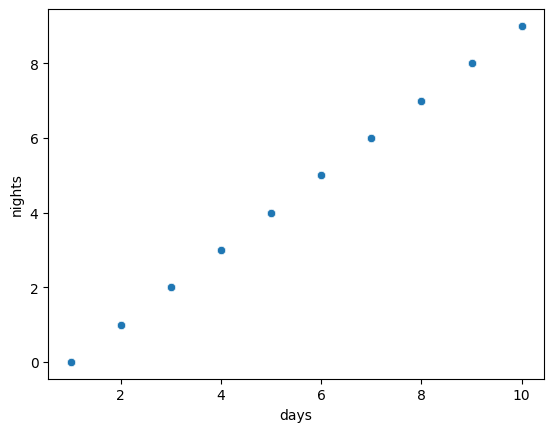

In [157]:
# is the 'nights' column necessary?
sns.scatterplot(data=df, x='days', y='nights')

In [158]:
df.rename(columns={'total_price_final_y':'total_price_final'}, inplace=True)

## Basic funnel analysis for an overview

In [159]:
# hotel 1
hotel1 = df[df['hotel_id']=='hotel_1'].drop(columns='hotel_id').copy()
hotel1['utc_datetime'] = pd.to_datetime(hotel1['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel1 = hotel1[hotel1['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel1.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

# hotel 2
hotel2 = df[df['hotel_id']=='hotel_2'].drop(columns='hotel_id').copy()
hotel2['utc_datetime'] = pd.to_datetime(hotel2['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel2 = hotel2[hotel2['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel2.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

# hotel 3
hotel3 = df[df['hotel_id']=='hotel_3'].drop(columns='hotel_id').copy()
hotel3['utc_datetime'] = pd.to_datetime(hotel3['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
hotel3 = hotel3[hotel3['utc_datetime'] > '2024-09-17'].copy()
# keep the uniqe users
hotel3.drop_duplicates(subset='uuid', keep='last', inplace=True)  # there are some guests, who booked rooms several times (61 pieces in total). I keep the last booking

In [160]:
funnel1 = list()
funnel1.append(len(hotel1))
funnel1.append(len(hotel1[(hotel1[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0])) # where there was at least 1 offered room
funnel1.append((hotel1['conversion']==1).sum())

In [161]:
funnel2 = list()
funnel2.append(len(hotel2))
funnel2.append(len(hotel2[(hotel2[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0]))
funnel2.append((hotel2['conversion']==1).sum())

In [162]:
funnel3 = list()
funnel3.append(len(hotel3))
funnel3.append(len(hotel3[(hotel3[['ROOMAA_room_price_min','ROOMBB_room_price_min','ROOMCC_room_price_min','ROOMDD_room_price_min','ROOMEE_room_price_min','ROOMFF_room_price_min','ROOMGG_room_price_min','ROOMHH_room_price_min']].notna().sum(axis=1))>0]))
funnel3.append((hotel3['conversion']==1).sum())

In [163]:
(np.array(funnel1)/len(hotel1))

array([1.        , 0.93153406, 0.07033532])

[Text(0, 0, 'Mean:\n100.00'),
 Text(0, 0, 'Mean:\n93.70'),
 Text(0, 0, 'Mean:\n4.88')]

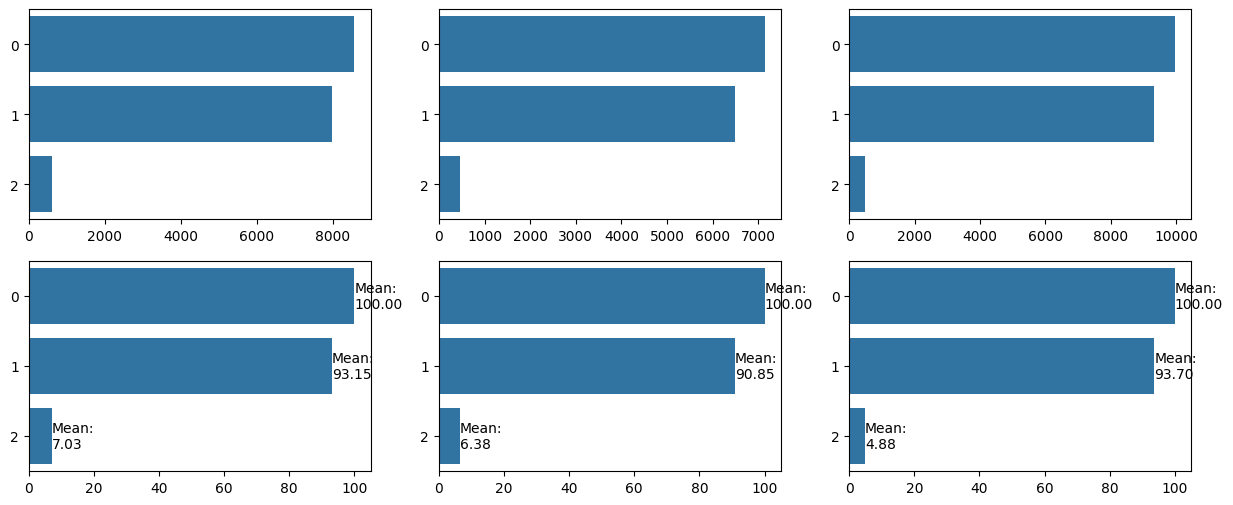

In [164]:
fig, ((ax11, ax12, ax13), (ax21, ax22, ax23)) = plt.subplots(2, 3, figsize=(15,6))
sns.barplot(ax=ax11, y=np.arange(len(funnel1)), x=funnel1 , orient='h')
sns.barplot(ax=ax12, y=np.arange(len(funnel2)), x=funnel2, orient='h')
sns.barplot(ax=ax13, y=np.arange(len(funnel3)), x=funnel3, orient='h')

sns.barplot(ax=ax21, y=np.arange(len(funnel1)), x=(np.array(funnel1)/len(hotel1))*100 , orient='h').bar_label(ax21.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
sns.barplot(ax=ax22, y=np.arange(len(funnel2)), x=(np.array(funnel2)/len(hotel2))*100, orient='h').bar_label(ax22.containers[-1], fmt='Mean:\n%.2f', label_type='edge')
sns.barplot(ax=ax23, y=np.arange(len(funnel3)), x=(np.array(funnel3)/len(hotel3))*100, orient='h').bar_label(ax23.containers[-1], fmt='Mean:\n%.2f', label_type='edge')

# 1: datepicker unique visitors
# 2: room offered
# 3: booked

### Time-delay between the first datepicker visit and then the booking

In [165]:
# calculate the time difference between the first visit and the booking

return_time = []
for hotel_num in ['hotel_1', 'hotel_2', 'hotel_3']:
    for index, row in df[df['uuid'].duplicated(keep='first') & (df['conversion'] == 1) & (df['hotel_id']==hotel_num)]['uuid'].items():
    
        i_first = df[df['uuid'].duplicated(keep=False) & (df['hotel_id']==hotel_num) & (df['uuid']==row)]['uuid'].index[0]
        i_last = df[df['uuid'].duplicated(keep=False) & (df['hotel_id']==hotel_num) & (df['uuid']==row)]['uuid'].index[-1]

        return_time.append({
            'uuid': row,
            'first_visit': df.loc[i_first, 'utc_datetime'],
            'last_visit': df.loc[i_last, 'utc_datetime'],
            'hotel_id': hotel_num
        })
    
return_time = pd.DataFrame(return_time)

In [166]:
return_time['time_diff'] = (pd.to_datetime(return_time['last_visit'], format='%Y-%m-%d %H:%M:%S') - pd.to_datetime(return_time['first_visit'], format='%Y-%m-%d %H:%M:%S')).dt.total_seconds() / 3600 # in hours

<Axes: ylabel='Frequency'>

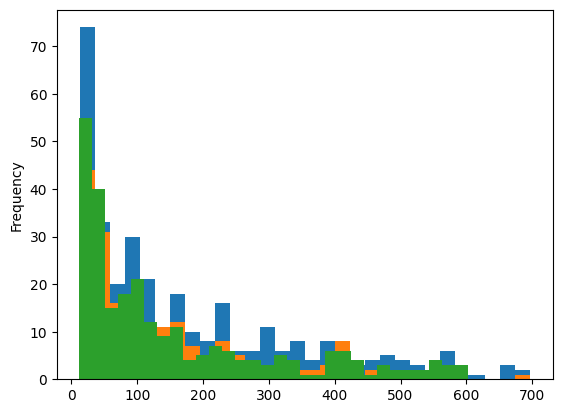

In [167]:
return_time[(return_time['hotel_id']=='hotel_1') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)
return_time[(return_time['hotel_id']=='hotel_2') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)
return_time[(return_time['hotel_id']=='hotel_3') & (return_time['time_diff']>12)]['time_diff'].plot(kind='hist', bins=30)

<Axes: xlabel='total_price_final', ylabel='picked_price_median'>

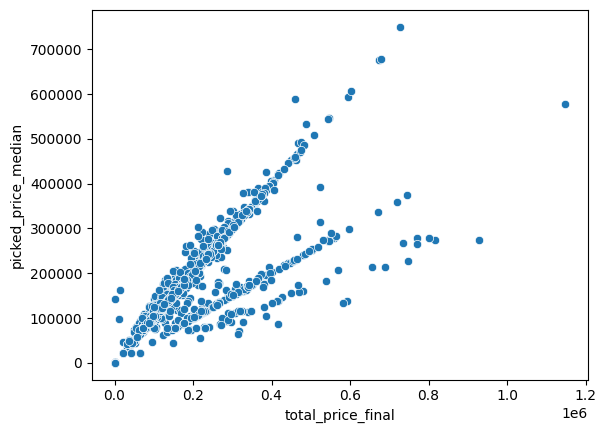

In [168]:
sns.scatterplot(data=df, x='total_price_final' ,y='picked_price_median')

<Axes: xlabel='total_price_final', ylabel='rooms_total_price'>

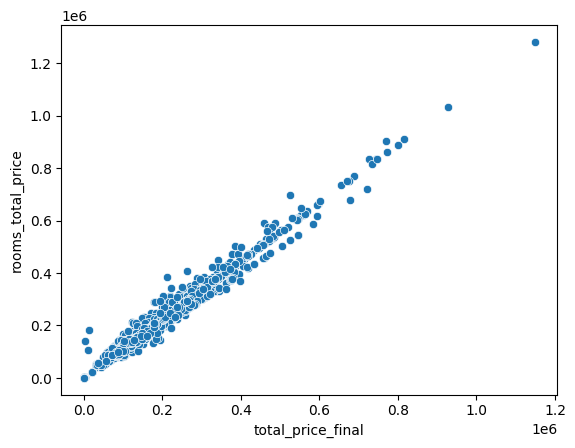

In [169]:
sns.scatterplot(data=df, x='total_price_final' ,y='rooms_total_price')


In [170]:
# currency conversion

# ccrape down the EUR exchange rate data from MNB's webpage

import requests
from bs4 import BeautifulSoup

# Define the URL
url = 'https://www.mnb.hu/arfolyam-tablazat?deviza=rbCurrencyActual&devizaSelected=EUR&datefrom=2024.09.17.&datetill=2024.10.18.&order=1'

# Fetch the page content
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table') 

# rows into a table
table_data = []
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    table_data.append([cell.get_text(strip=True) for cell in cells])

eur_price = pd.DataFrame(table_data[1:], columns=table_data[0])  # first row to header

eur_price = eur_price.drop(index=[0,1]).reset_index()

eur_price = eur_price.rename(columns={'':'date'})[['date','EUR']]

In [171]:
# dates to YYYY-MM-DD format

hungarian_to_english = {
    'január': 'January', 'február': 'February', 'március': 'March', 'április': 'April',
    'május': 'May', 'június': 'June', 'július': 'July', 'augusztus': 'August',
    'szeptember': 'September', 'október': 'October', 'november': 'November', 'december': 'December',
    'hétfő': 'Monday', 'kedd': 'Tuesday', 'szerda': 'Wednesday', 'csütörtök': 'Thursday',
    'péntek': 'Friday', 'szombat': 'Saturday', 'vasárnap': 'Sunday'
}

def convert_hungarian_date(date_str):
    for hun, eng in hungarian_to_english.items():
        date_str = date_str.replace(hun, eng)
    date_obj = datetime.strptime(date_str, '%Y. %B %d., %A')
    return date_obj.strftime('%Y-%m-%d')

# apply the function to the df column
eur_price['date'] = eur_price['date'].apply(convert_hungarian_date)

In [172]:
eur_price['date'] = pd.to_datetime(eur_price['date'])

In [173]:
# Convert date column to datetime and value column to numeric
eur_price.set_index('date', inplace=True)

# Create a complete date range from the first to the last date
date_range = pd.date_range(start=eur_price.index.min(), end=eur_price.index.max(), freq='D')

# Reindex the DataFrame to include all dates in the range
eur_price = eur_price.reindex(date_range)

In [174]:
eur_price['EUR'] = eur_price['EUR'].fillna(method='ffill')

In [175]:
def conversion(x):
    rate = eur_price[eur_price.index == x]['EUR'].values
    if rate:
        return float(rate[0].replace(',', '.')) 
    else:
        return None

In [176]:
df['simple_date'] = pd.to_datetime(df['utc_datetime'], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

In [177]:
# Set the default conversion rate to 1
df['conversion_rate'] = 1

# Update 'conversion_rate' only where 'currency' is 'EUR'
df.loc[df['currency'] == 'EUR', 'conversion_rate'] = df.loc[df['currency'] == 'EUR', 'simple_date'].apply(conversion)

In [178]:
df['total_price_final'] = df['conversion_rate']*df['total_price_final']
df['rooms_total_price'] = df['conversion_rate']*df['rooms_total_price']
df['upsell_total_price'] = df['conversion_rate']*df['upsell_total_price']
df['vouchers_total_price'] = df['conversion_rate']*df['vouchers_total_price']
df['loyalty_discount_total'] = df['conversion_rate']*df['loyalty_discount_total']
df['picked_price_median'] = df['conversion_rate']*df['picked_price_median']

In [179]:
df.drop(columns=['conversion_rate', 'simple_date'], inplace=True)

In [180]:
# new column, if_children = 1, if children included
df['if_children'] = 0
df['if_children'].loc[df['children'] > 0] = 1

In [181]:
# new_column = picked_room_price/night

df['picked_price_p_night'] = df['picked_price_median']/df['nights']

In [182]:
df['arrival'] = pd.to_datetime(df['arrival'])
df['departure'] = pd.to_datetime(df['departure'])
df['utc_datetime'] = pd.to_datetime(df['utc_datetime'])

In [183]:
# extract date information
    # - day of the week
    # - weekend and public holiday or not
    # - time of the day

import holidays
hungarian_holidays = holidays.Hungary()

df['day_of_week'] = df['utc_datetime'].dt.dayofweek + 1
df['is_holiday'] = ((df['day_of_week'].isin([6, 7])) | (df['utc_datetime'].dt.date.apply(lambda x: x in hungarian_holidays)))

# time of day
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

df['time_of_day'] = df['utc_datetime'].dt.hour.apply(get_time_of_day)

In [184]:
# extract information from the arrival and departure information

# time netween arrival and booking
df['lead_time'] = (df['arrival'] - df['utc_datetime']).dt.days

- introduce new variables

In [194]:

# group lead time into categories
def lead_time_category(days):
    if days <= 7:
        return 'last_minute'
    elif days <= 30:
        return 'short_term'
    elif days <= 90:
        return 'medium_term'
    else:
        return 'long_term'
df['lead_time_category'] = df['lead_time'].apply(lead_time_category)


# day of the week for arrival and departure
df['arrival_day_of_week'] = df['arrival'].dt.dayofweek + 1
df['departure_day_of_week'] = df['departure'].dt.dayofweek + 1

# holiday or weekend flag for arrival and departure
df['arrival_is_holiday'] = (df['arrival_day_of_week'].isin([6, 7]) | (df['arrival'].dt.date.apply(lambda x: x in hungarian_holidays)))
df['departure_is_holiday'] = (df['departure_day_of_week'].isin([6, 7]) | (df['departure'].dt.date.apply(lambda x: x in hungarian_holidays)))


# create new variable for the entire stay period

#generate a list of dates for each stay period
df['stay_dates'] = df.apply(lambda x: pd.date_range(x['arrival'], x['departure'], freq='D'), axis=1)
# check if stay includes a weekend or a public holiday
df['stay_includes_weekend'] = df['stay_dates'].apply(lambda dates: any(((date.weekday() in [5, 6]) | (date in hungarian_holidays)) for date in dates))
# extract all unique days of the week included in the stay period
df['days_of_week_in_stay'] = df['stay_dates'].apply(lambda dates: {date.weekday() + 1 for date in dates})
# count the number of specific weekdays
df['num_saturdays'] = df['stay_dates'].apply(lambda dates: sum(date.weekday() == 5 for date in dates))
df['num_sundays'] = df['stay_dates'].apply(lambda dates: sum(date.weekday() == 6 for date in dates))

In [195]:
df.drop(columns='days', inplace=True)

In [196]:
print(str(df['nights'].mean()) + ', '+ str(df['nights'].std()))

2.4905803864634106, 1.0498191099852285


### RFM

In [197]:
# RFM segmentation, based on: picked_price_median, days
# define segment boundaries based low duration = mean-1*std, medium duration = mean+-1*std, long duration = mean+1*std

df['rfm_monetary_score'] = pd.qcut(df['picked_price_p_night'], 4, labels=False)
df['rfm_duration_score'] = pd.cut(df['nights'], bins=[min(df['nights'])] + list([2, 4]) + [max(df['nights'])], labels=['1','2-3','4-9'] ,right=True)

In [198]:
df['picked_price_p_night'].quantile([0.25, 0.5, 0.75])

0.25    47750.708333
0.50    60515.500000
0.75    79605.188267
Name: picked_price_p_night, dtype: float64

In [199]:
# add mean children age column
df['children_age_mean'] = df[['0_age', '1_age', '2_age', '3_age', '4_age']].mean(axis=1)

In [200]:
df.columns

Index(['search_log_session_id', 'uuid', 'session_id', 'utm_source',
       'utm_medium', 'utm_campaign', 'hotel_id', 'search_log_id',
       'utc_datetime', 'lang_code', 'currency', 'arrival', 'departure',
       'nights', 'adults', 'children', 'conversion', 'search_log_room_id',
       'sel_num_of_rooms', 'picked_price_median', 'picked_room', '0_age',
       '1_age', '2_age', '3_age', '4_age', 'baby_bed', 'ROOMAA_room_price_min',
       'ROOMAA_room_price_max', 'ROOMBB_room_price_min',
       'ROOMBB_room_price_max', 'ROOMCC_room_price_min',
       'ROOMCC_room_price_max', 'ROOMDD_room_price_min',
       'ROOMDD_room_price_max', 'ROOMEE_room_price_min',
       'ROOMEE_room_price_max', 'ROOMFF_room_price_min',
       'ROOMFF_room_price_max', 'ROOMGG_room_price_min',
       'ROOMGG_room_price_max', 'ROOMHH_room_price_min',
       'ROOMHH_room_price_max', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_

In [201]:
# rearrange columns

df = df[['search_log_session_id', 'search_log_id', 'session_id', 'search_log_room_id','uuid', 'utc_datetime', 'utm_source',
   'utm_medium', 'utm_campaign','lang_code', 'currency', 'arrival', 'departure', 'nights',
    'adults', 'children', 'if_children',  'children_age_mean', 'conversion',
    'sel_num_of_rooms', 'picked_price_median', 'picked_price_p_night','picked_room', 'baby_bed', 'pieces', 'sum_price', 'total_price_final',
    'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
    'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id', 'rfm_monetary_score', 'rfm_duration_score', '0_age',
    '1_age', '2_age', '3_age', '4_age', 'ROOMAA_room_price_min',
    'ROOMAA_room_price_max', 'ROOMBB_room_price_min','ROOMBB_room_price_max', 'ROOMCC_room_price_min',
    'ROOMCC_room_price_max', 'ROOMDD_room_price_min','ROOMDD_room_price_max', 'ROOMEE_room_price_min',
    'ROOMEE_room_price_max', 'ROOMFF_room_price_min','ROOMFF_room_price_max', 'ROOMGG_room_price_min',
    'ROOMGG_room_price_max', 'ROOMHH_room_price_min','ROOMHH_room_price_max', 'day_of_week',
    'is_holiday', 'time_of_day', 'stay_dates', 'lead_time',
    'lead_time_category', 'arrival_day_of_week', 'departure_day_of_week',
    'arrival_is_holiday', 'departure_is_holiday', 'stay_includes_weekend',
    'days_of_week_in_stay', 'num_saturdays', 'num_sundays']]

In [202]:
hotel1 = df[df['hotel_id']=='hotel_1'].drop(columns='hotel_id').copy()
hotel2 = df[df['hotel_id']=='hotel_2'].drop(columns='hotel_id').copy()
hotel3 = df[df['hotel_id']=='hotel_3'].drop(columns='hotel_id').copy()

# Analysis

<Axes: ylabel='Frequency'>

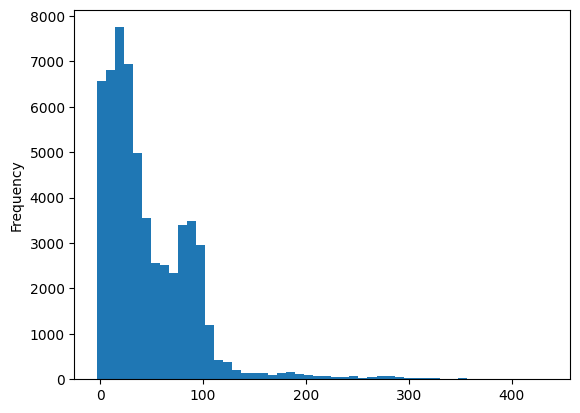

In [203]:
df['lead_time'].plot(kind='hist', bins=50)

<Axes: xlabel='lead_time', ylabel='Density'>

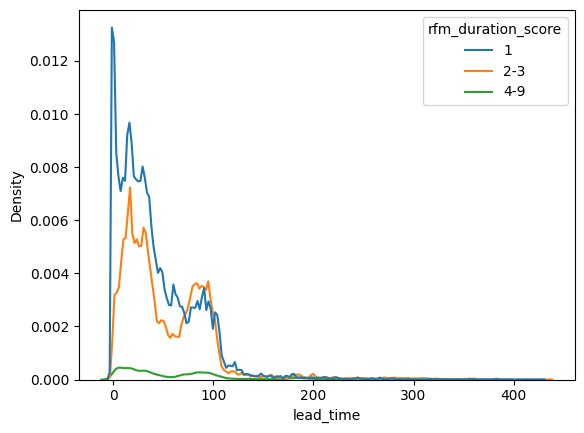

In [204]:
sns.kdeplot(data=df, x='lead_time', bw_adjust=0.2, hue='rfm_duration_score')

<Axes: xlabel='lead_time', ylabel='Count'>

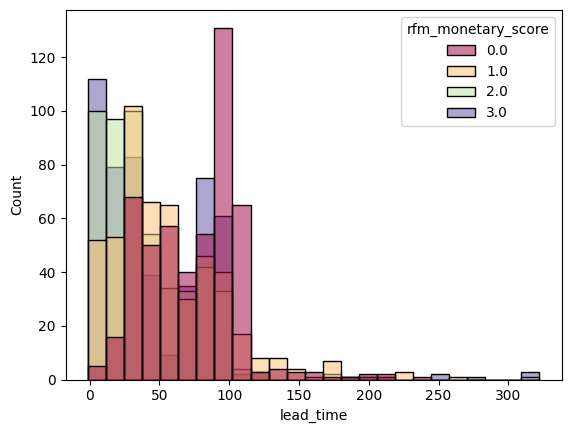

In [205]:
sns.histplot(data=df, x='lead_time', bins=25, hue='rfm_monetary_score',palette='Spectral')

<Axes: xlabel='lead_time', ylabel='Count'>

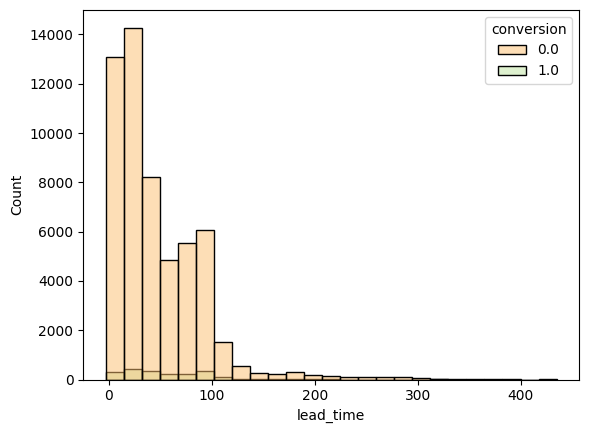

In [350]:
sns.histplot(data=df, x='lead_time', bins=25, hue='conversion',palette='Spectral')

<Axes: xlabel='lead_time', ylabel='picked_price_p_night'>

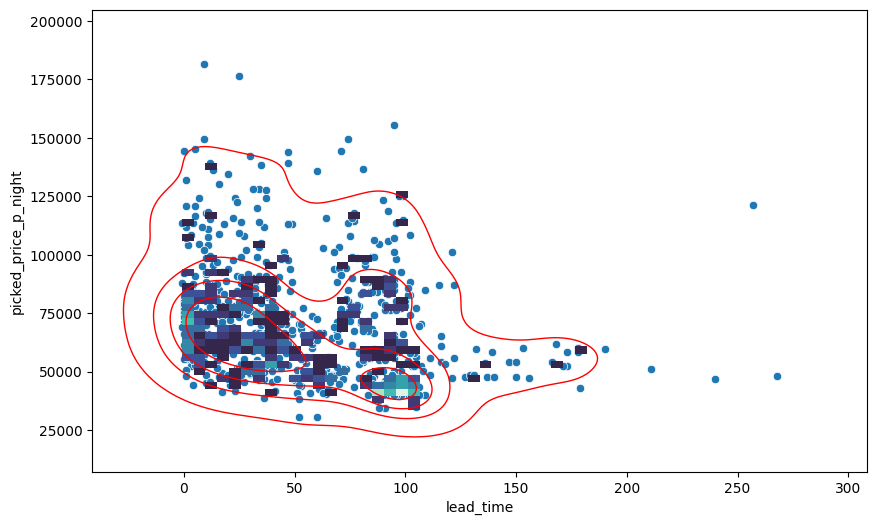

In [206]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(ax=ax, data=hotel1, x='lead_time', y='picked_price_p_night')
sns.histplot(ax=ax, data=hotel1, x='lead_time', y='picked_price_p_night', bins=50, cmap="mako",pthresh=.001)
sns.kdeplot(ax=ax, data=hotel1, x='lead_time', y='picked_price_p_night', levels=5, color="r", linewidths=1)

<Axes: xlabel='nights', ylabel='lead_time'>

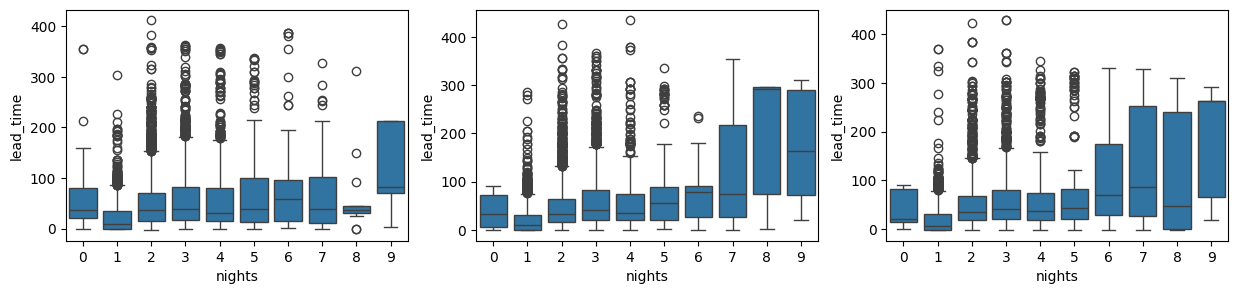

In [404]:
# Hows does the stay duration influences the lead time?
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
sns.boxplot(ax=ax1 ,data=hotel1, y='lead_time', x='nights')
sns.boxplot(ax=ax2 ,data=hotel2, y='lead_time', x='nights')
sns.boxplot(ax=ax3 ,data=hotel3, y='lead_time', x='nights')

In [406]:
hotel1[['rfm_duration_score', 'lead_time']].groupby(by='rfm_duration_score').mean()

,lead_time
rfm_duration_score,
1,43.064869
2-3,52.144677
4-9,70.057143


<Axes: xlabel='rfm_duration_score', ylabel='lead_time'>

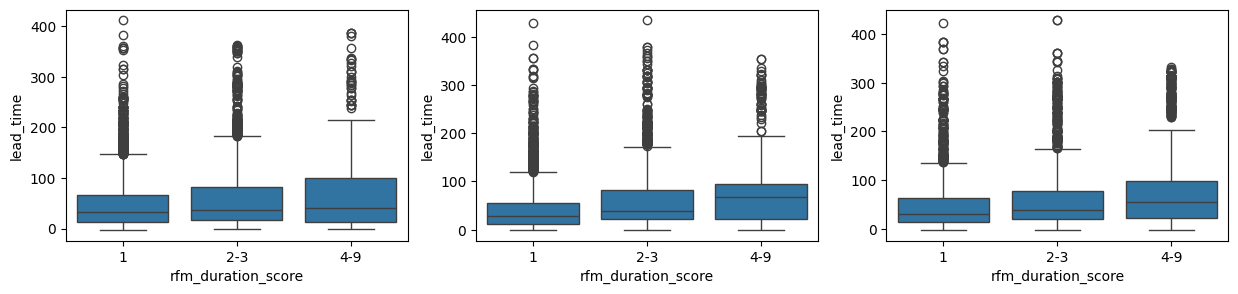

In [405]:
# Hows does the stay duration influences the lead time?
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
sns.boxplot(ax=ax1 ,data=hotel1, y='lead_time', x='rfm_duration_score')
sns.boxplot(ax=ax2 ,data=hotel2, y='lead_time', x='rfm_duration_score')
sns.boxplot(ax=ax3 ,data=hotel3, y='lead_time', x='rfm_duration_score')

# EDA and Segmentation


- what are the most important variables for segmentation?

<Axes: xlabel='nights', ylabel='Count'>

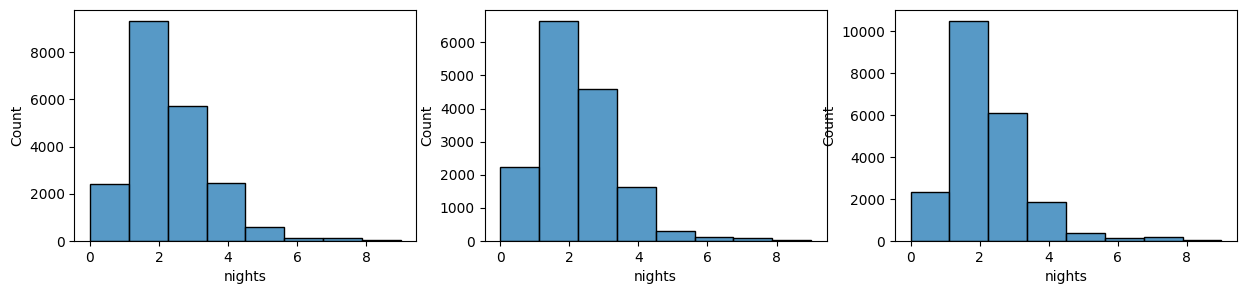

In [207]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.histplot(ax=ax1, data=hotel1, x='nights', bins=8)
sns.histplot(ax=ax2, data=hotel2, x='nights', bins=8)
sns.histplot(ax=ax3, data=hotel3, x='nights', bins=8)

<Axes: xlabel='nights', ylabel='picked_price_p_night'>

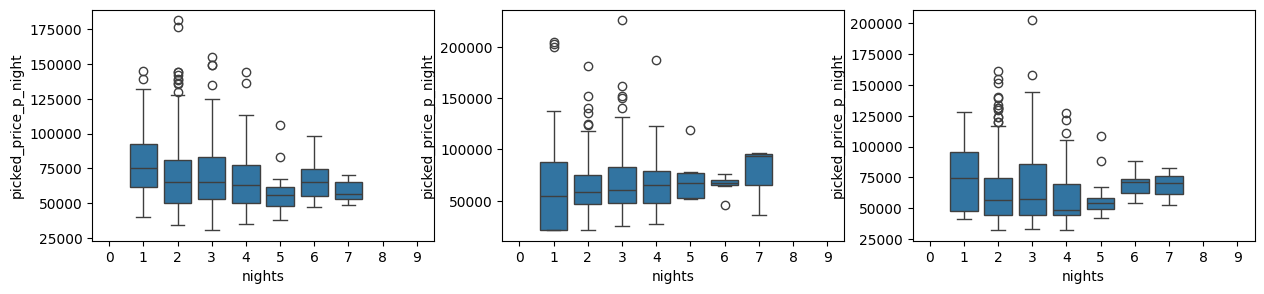

In [208]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.boxplot(ax=ax1, data=hotel1, x ='nights', y='picked_price_p_night')
sns.boxplot(ax=ax2, data=hotel2, x ='nights', y='picked_price_p_night')
sns.boxplot(ax=ax3, data=hotel3, x ='nights', y='picked_price_p_night')

<Axes: xlabel='picked_price_p_night', ylabel='Count'>

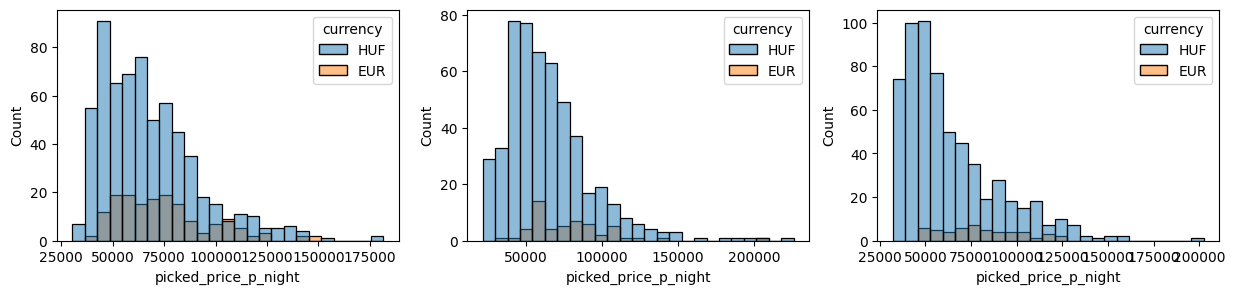

In [209]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,3))
sns.histplot(ax=ax1, data=hotel1, x='picked_price_p_night', bins=25, hue='currency')
sns.histplot(ax=ax2, data=hotel2, x='picked_price_p_night', bins=25, hue='currency')
sns.histplot(ax=ax3, data=hotel3, x='picked_price_p_night', bins=25, hue='currency')  #lognorm distribution

In [210]:
hotel1.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room_price_max',
       'ROOMEE_room_price_min', 'ROOMEE_room_price_max',
       'ROOMFF_

In [211]:
# this drops the duplicates in uuid!!! - keeping only the last room search
pd.concat([df[['hotel_id','uuid','adults', 'children', 'if_children', 'conversion','sel_num_of_rooms',
               'picked_price_p_night','children_age_mean', 'baby_bed','rfm_duration_score']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).drop_duplicates(subset='uuid', keep='last').drop(columns='uuid').groupby(by=['hotel_id','rfm_duration_score']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [212]:
# with every room search
pd.concat([df[['hotel_id','adults', 'children', 'if_children', 'conversion','sel_num_of_rooms',
               'picked_price_p_night','children_age_mean', 'baby_bed','rfm_duration_score']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).groupby(by=['hotel_id','rfm_duration_score']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [213]:
# groupby if=weekend

In [214]:
# with every conversion
pd.concat([df[['hotel_id','adults', 'children', 'if_children','sel_num_of_rooms','nights',
               'children_age_mean', 'baby_bed','rfm_monetary_score']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).groupby(by=['hotel_id','rfm_monetary_score']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

In [218]:
df[df['if_children']==True][['hotel_id','children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean()

children
hotel_id rfm_monetary_score          
hotel_1  0.0                 1.392857
         1.0                 1.709677
         2.0                 1.743243
         3.0                 1.757143
hotel_2  0.0                 1.166667
         1.0                 1.250000
         2.0                 1.465116
         3.0                 1.693333
hotel_3  0.0                 1.600000
         1.0                 1.100000
         2.0                 1.619048
         3.0                 1.740000

Text(0, 0.5, 'average number of childrens')

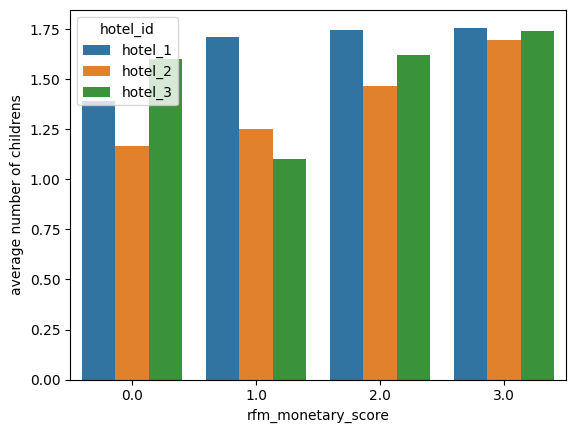

In [222]:
sns.barplot(data=df[df['if_children']==True][['hotel_id','children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean().reset_index(), x='rfm_monetary_score', y='children', hue='hotel_id')
plt.ylabel('average number of childrens')

<Axes: xlabel='rfm_monetary_score'>

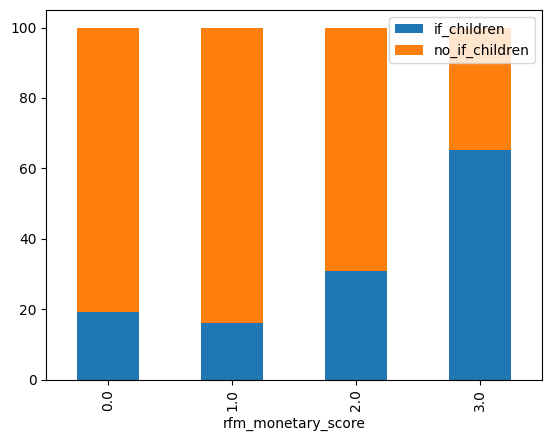

In [ ]:
test = (hotel1[['if_children','rfm_monetary_score']].groupby(by='rfm_monetary_score').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(x='rfm_monetary_score',kind='bar',stacked=True)

<Axes: xlabel='if_children', ylabel='rfm_monetary_score'>

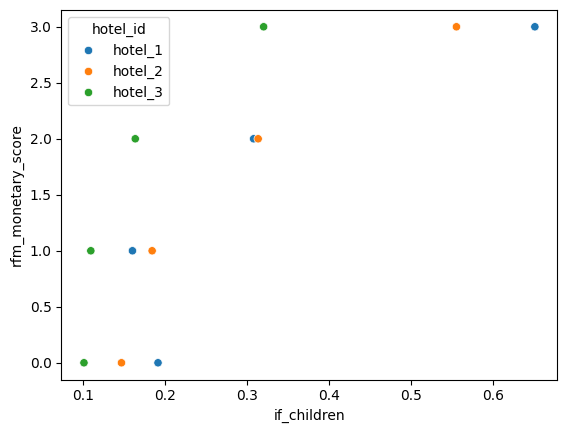

In [ ]:
sns.scatterplot(data=df[['hotel_id','if_children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean().reset_index(), y='rfm_monetary_score', x='if_children', hue='hotel_id')

In [ ]:
df[['hotel_id','children','rfm_monetary_score']].groupby(by=['hotel_id','rfm_monetary_score']).mean().reset_index()

,hotel_id,rfm_monetary_score,children
0,hotel_1,0.0,0.267123
1,hotel_1,1.0,0.274611
2,hotel_1,2.0,0.537500
3,hotel_1,3.0,1.144186
4,hotel_2,0.0,0.171779
5,hotel_2,1.0,0.230769
6,hotel_2,2.0,0.459854
7,hotel_2,3.0,0.940741
8,hotel_3,0.0,0.162437
9,hotel_3,1.0,0.120879


In [ ]:
# with every conversion
pd.concat([df[['hotel_id','adults', 'if_children','sel_num_of_rooms','nights','picked_price_p_night','conversion']],
           df[['upsell_total_price', 'loyalty_discount_total','redeemed_loyalty_points_total']].replace(to_replace=0, value=None)], axis=1).groupby(by=['hotel_id','if_children']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

<Axes: xlabel='if_children', ylabel='picked_price_p_night'>

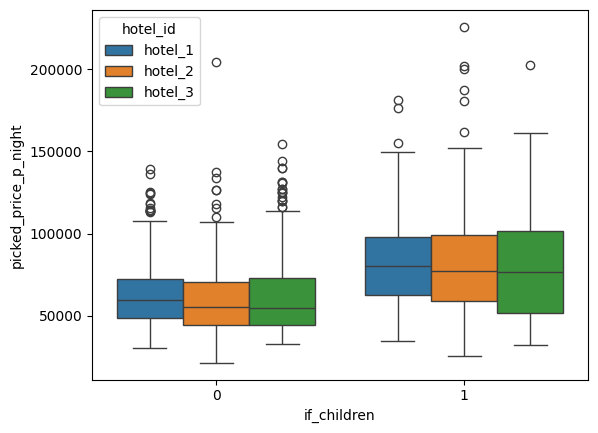

In [ ]:
sns.boxplot(data=df, x='if_children', y='picked_price_p_night', hue='hotel_id')

<Axes: xlabel='hotel_id', ylabel='upsell_total_price'>

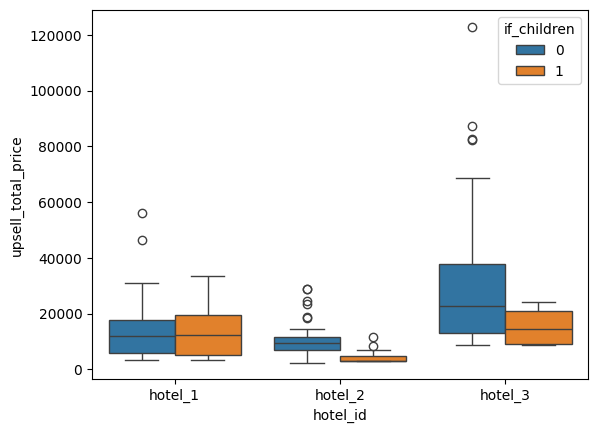

In [ ]:
sns.boxplot(data=df[df['upsell_total_price']>0], x='hotel_id', y='upsell_total_price', hue='if_children')

<Axes: xlabel='if_children', ylabel='conversion'>

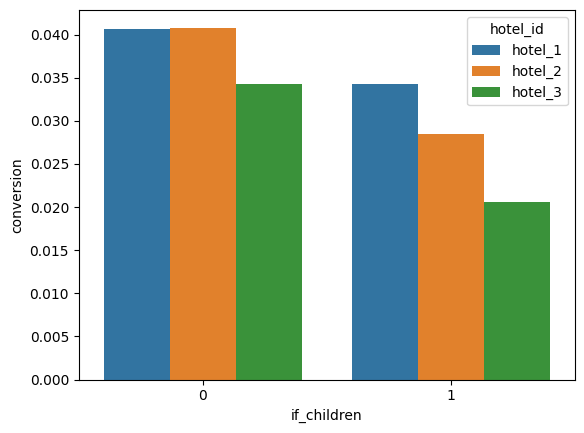

In [ ]:
sns.barplot(data=df[['hotel_id','if_children','conversion']].groupby(by=['hotel_id','if_children']).mean(), x='if_children', y='conversion', hue='hotel_id')

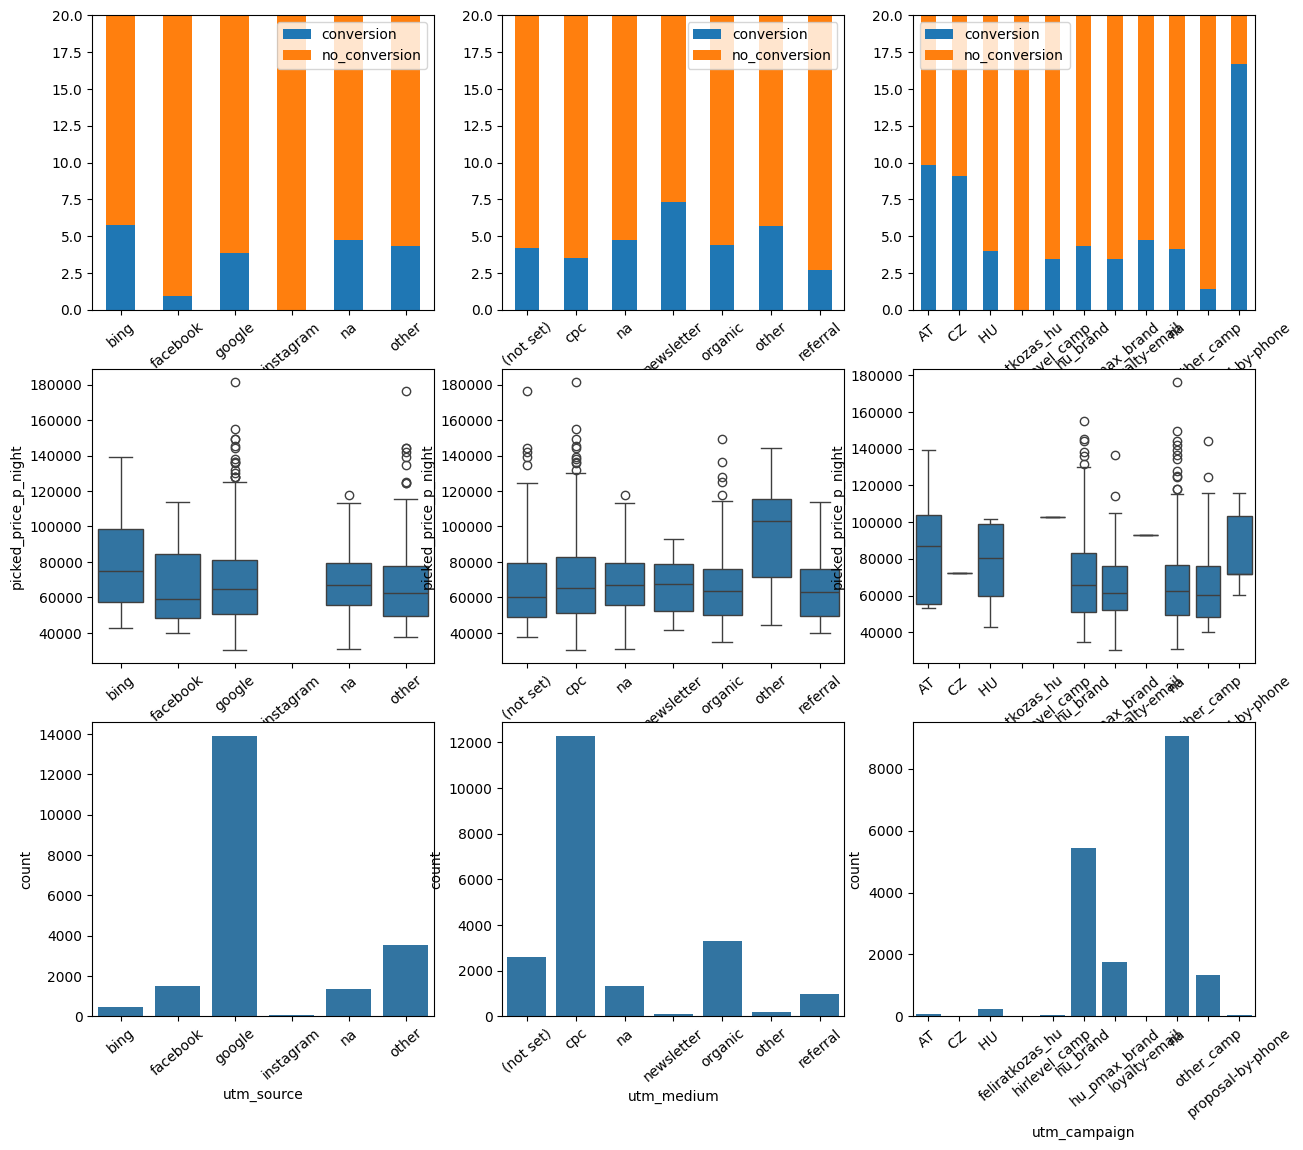

In [ ]:
# stacked barplot according to utm_campaign, medium and source for each hotel

fig, ((ax1, ax2, ax3), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3,3, figsize=(15,13))

test = (hotel1[['conversion','utm_source']].groupby(by='utm_source').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='utm_source',kind='bar',stacked=True, ax=ax1).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

test2 = (hotel1[['conversion','utm_medium']].groupby(by='utm_medium').mean()*100).reset_index()
test2['no_conversion'] = 100-test2['conversion']
test2.plot(x='utm_medium',kind='bar',stacked=True, ax=ax2).tick_params(axis='x', rotation=40)
ax2.set_ylim(top=20)

test3 = (hotel1[['conversion','utm_campaign']].groupby(by='utm_campaign').mean()*100).reset_index()
test3['no_conversion'] = 100-test3['conversion']
test3.plot(x='utm_campaign',kind='bar',stacked=True, ax=ax3).tick_params(axis='x', rotation=40)
ax3.set_ylim(top=20)

sns.boxplot(data=hotel1, x='utm_source', y='picked_price_p_night', ax=ax21, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel1, x='utm_medium', y='picked_price_p_night', ax=ax22, order=['(not set)', 'cpc', 'na', 'newsletter', 'organic', 'other','referral']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel1, x='utm_campaign', y='picked_price_p_night', ax=ax23, order=['AT ', 'CZ ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

sns.countplot(data=hotel1, x='utm_source', ax=ax31, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel1, x='utm_medium', ax=ax32, order=['(not set)', 'cpc', 'na', 'newsletter', 'organic', 'other','referral']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel1, x='utm_campaign', ax=ax33, order=['AT ', 'CZ ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

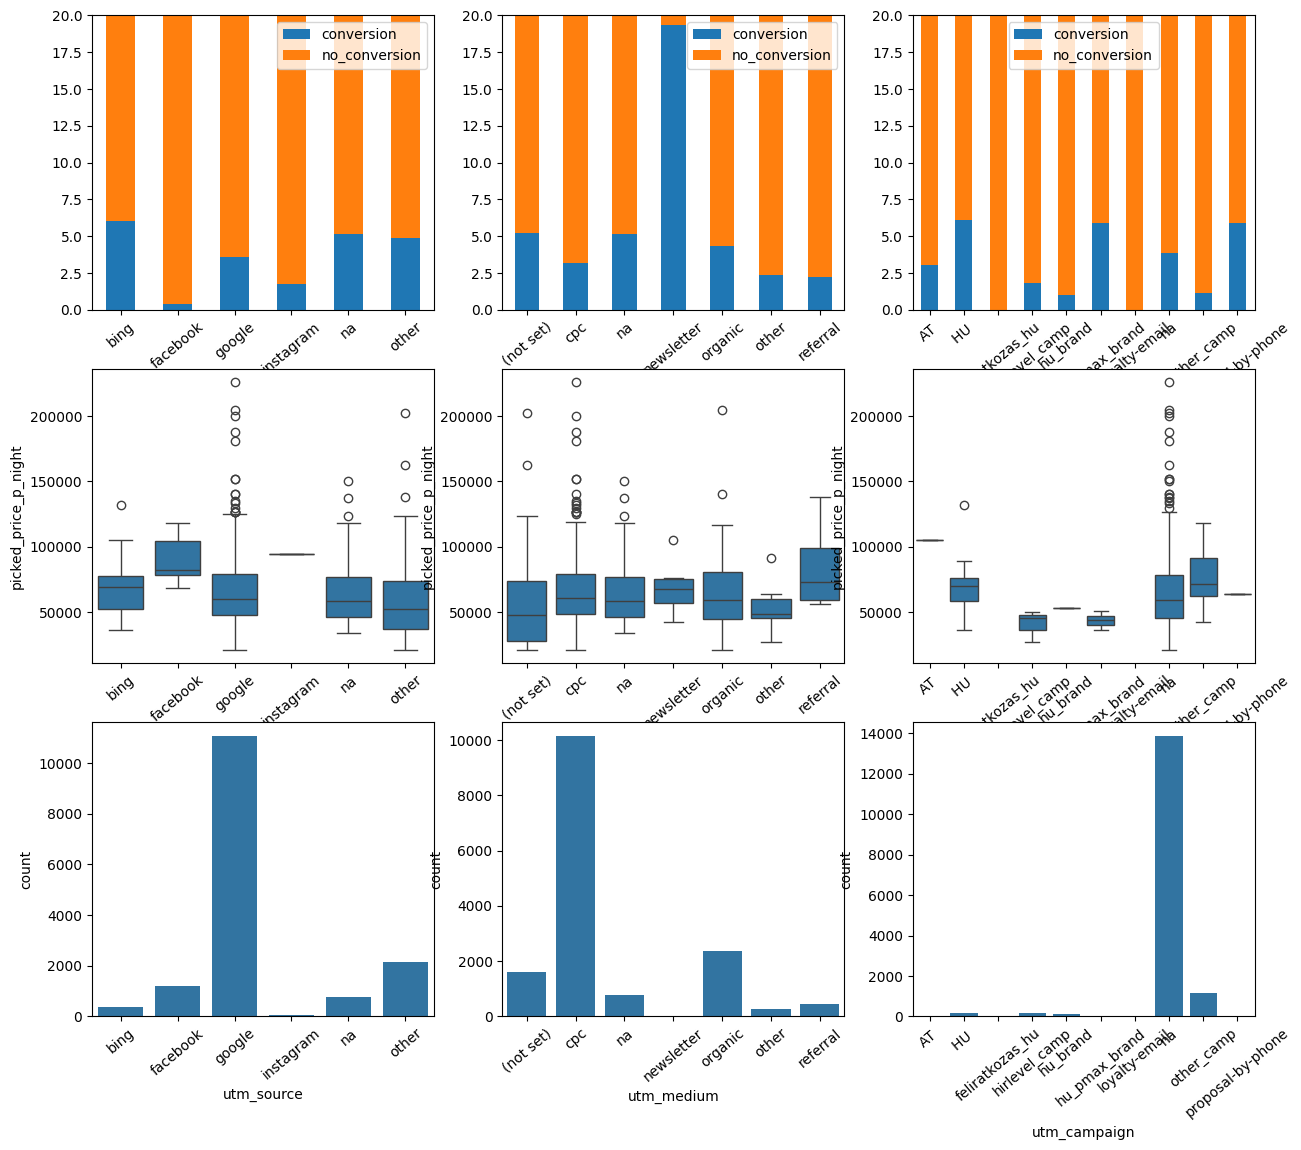

In [ ]:
fig, ((ax1, ax2, ax3), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3,3, figsize=(15,13))

test = (hotel2[['conversion','utm_source']].groupby(by='utm_source').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='utm_source',kind='bar',stacked=True, ax=ax1).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

test2 = (hotel2[['conversion','utm_medium']].groupby(by='utm_medium').mean()*100).reset_index()
test2['no_conversion'] = 100-test2['conversion']
test2.plot(x='utm_medium',kind='bar',stacked=True, ax=ax2).tick_params(axis='x', rotation=40)
ax2.set_ylim(top=20)

test3 = (hotel2[['conversion','utm_campaign']].groupby(by='utm_campaign').mean()*100).reset_index()
test3['no_conversion'] = 100-test3['conversion']
test3.plot(x='utm_campaign',kind='bar',stacked=True, ax=ax3).tick_params(axis='x', rotation=40)
ax3.set_ylim(top=20)

sns.boxplot(data=hotel2, x='utm_source', y='picked_price_p_night', ax=ax21, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel2, x='utm_medium', y='picked_price_p_night', ax=ax22, order=['(not set)', 'cpc', 'na', 'newsletter', 'organic', 'other','referral']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel2, x='utm_campaign', y='picked_price_p_night', ax=ax23, order=['AT ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

sns.countplot(data=hotel2, x='utm_source', ax=ax31, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel2, x='utm_medium', ax=ax32, order=['(not set)', 'cpc', 'na', 'newsletter', 'organic', 'other','referral']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel2, x='utm_campaign', ax=ax33, order=['AT ', 'HU ', 'feliratkozas_hu', 'hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone']).tick_params(axis='x', rotation=40)

In [ ]:
hotel2['utm_medium'].value_counts()

utm_medium
cpc           10145
organic        2368
(not set)      1596
na              758
referral        454
other           253
newsletter       31
Name: count, dtype: int64

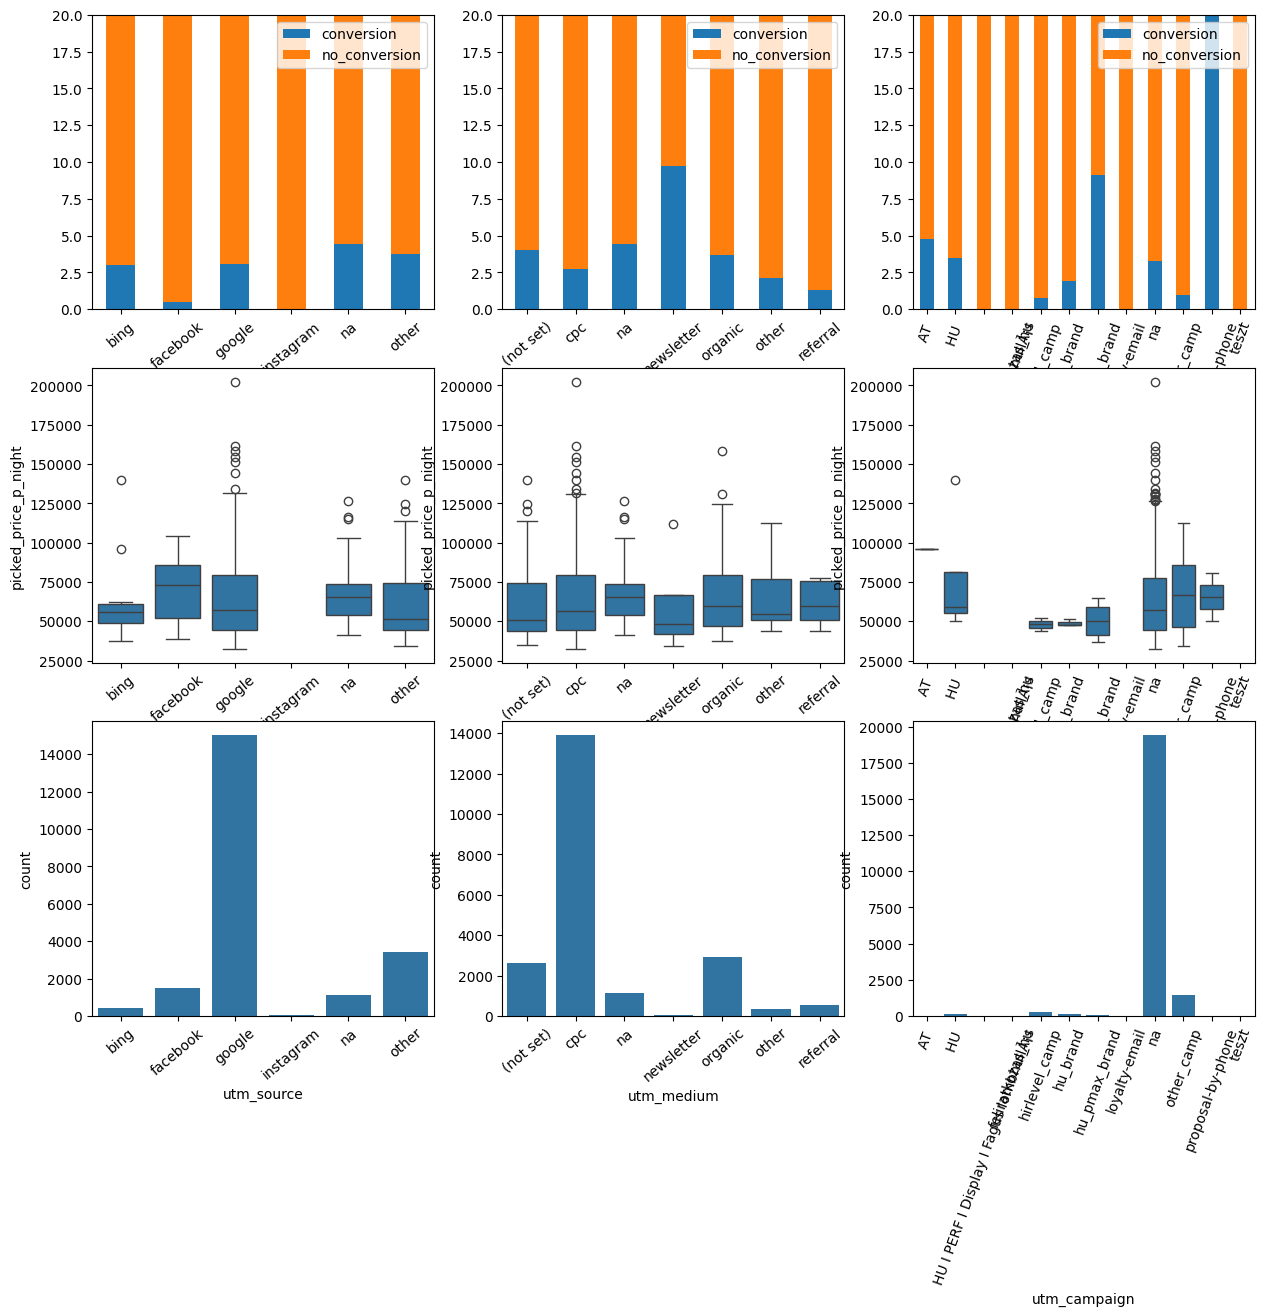

In [ ]:
fig, ((ax1, ax2, ax3), (ax21, ax22, ax23), (ax31, ax32, ax33)) = plt.subplots(3,3, figsize=(15,13))

test = (hotel3[['conversion','utm_source']].groupby(by='utm_source').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='utm_source',kind='bar',stacked=True, ax=ax1).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

test2 = (hotel3[['conversion','utm_medium']].groupby(by='utm_medium').mean()*100).reset_index()
test2['no_conversion'] = 100-test2['conversion']
test2.plot(x='utm_medium',kind='bar',stacked=True, ax=ax2).tick_params(axis='x', rotation=40)
ax2.set_ylim(top=20)

test3 = (hotel3[['conversion','utm_campaign']].groupby(by='utm_campaign').mean()*100).reset_index()
test3['no_conversion'] = 100-test3['conversion']
test3.plot(x='utm_campaign',kind='bar',stacked=True, ax=ax3).tick_params(axis='x', rotation=70)
ax3.set_ylim(top=20)

sns.boxplot(data=hotel3, x='utm_source', y='picked_price_p_night', ax=ax21, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel3, x='utm_medium', y='picked_price_p_night', ax=ax22, order=['(not set)', 'cpc', 'na', 'newsletter', 'organic', 'other','referral']).tick_params(axis='x', rotation=40)
sns.boxplot(data=hotel3, x='utm_campaign', y='picked_price_p_night', ax=ax23, order=['AT ', 'HU ', 'HU I PERF I Display I Fagus lombhullÃ¡s', 'feliratkozas_hu','hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone','teszt']).tick_params(axis='x', rotation=70)

sns.countplot(data=hotel3, x='utm_source', ax=ax31, order=['bing', 'facebook', 'google', 'instagram', 'na', 'other']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel3, x='utm_medium', ax=ax32, order=['(not set)', 'cpc', 'na', 'newsletter', 'organic', 'other','referral']).tick_params(axis='x', rotation=40)
sns.countplot(data=hotel3, x='utm_campaign', ax=ax33, order=['AT ', 'HU ', 'HU I PERF I Display I Fagus lombhullÃ¡s', 'feliratkozas_hu','hirlevel_camp', 'hu_brand','hu_pmax_brand','loyalty-email','na','other_camp','proposal-by-phone','teszt']).tick_params(axis='x', rotation=70)

<Axes: xlabel='currency', ylabel='nights'>

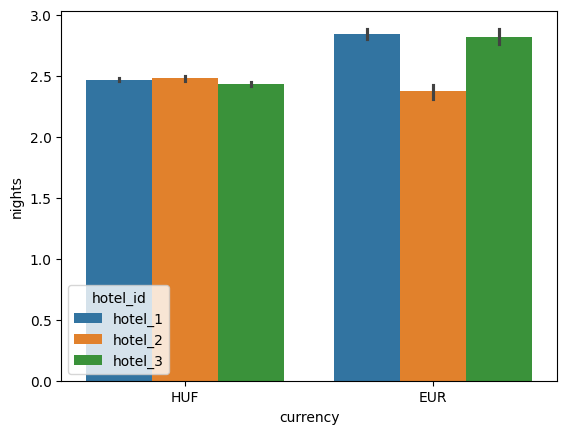

In [ ]:
sns.barplot(data=df, x='currency', y='nights', hue='hotel_id', estimator='mean')

In [223]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room_price_max',
       'ROOMEE_room_price_min', 'ROOMEE_room_price_max',
   

<Axes: xlabel='rfm_duration_score', ylabel='children_age_mean'>

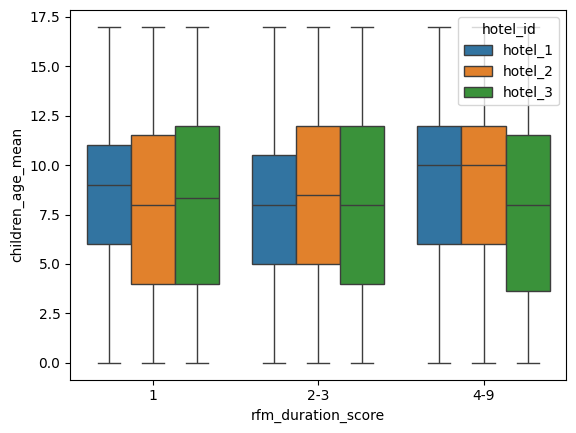

In [227]:
sns.boxplot(data=df[df['if_children']==True], x='rfm_duration_score', y='children_age_mean', hue='hotel_id')

<Axes: xlabel='currency'>

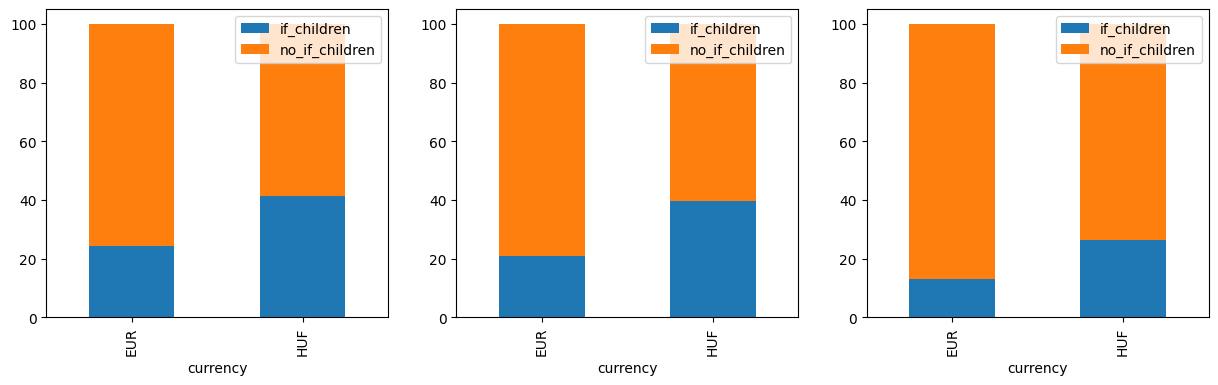

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))

test = (hotel1[['if_children','currency']].groupby(by='currency').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(ax=ax1, x='currency',kind='bar',stacked=True)

test = (hotel2[['if_children','currency']].groupby(by='currency').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(ax=ax2, x='currency',kind='bar',stacked=True)

test = (hotel3[['if_children','currency']].groupby(by='currency').mean()*100).reset_index()
test['no_if_children'] = 100-test['if_children']
test.plot(ax=ax3, x='currency',kind='bar',stacked=True)

In [ ]:
test = (hotel1[['if_children','currency']].groupby(by='currency').mean()*100).reset_index()
test['no_conversion'] = 100-test['conversion']
test.plot(x='utm_source',kind='bar',stacked=True, ax=ax1).tick_params(axis='x', rotation=40)
ax1.set_ylim(top=20)

In [ ]:
df[['hotel_id','picked_price_p_night','rfm_duration_score']].groupby(by=['hotel_id','rfm_duration_score']).median()

picked_price_p_night
hotel_id rfm_duration_score                      
hotel_1  1                           66225.750000
         2-3                         64691.500000
         4-9                         55857.600000
hotel_2  1                           57948.500000
         2-3                         62626.000000
         4-9                         67165.912000
hotel_3  1                           57720.500000
         2-3                         56365.166667
         4-9                         55653.217420

# Search patterns and key variables

- what are the visitors looking for?

In [ ]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room_price_max',
       'ROOMEE_room_price_min', 'ROOMEE_room_price_max',
   

<Axes: xlabel='arrival'>

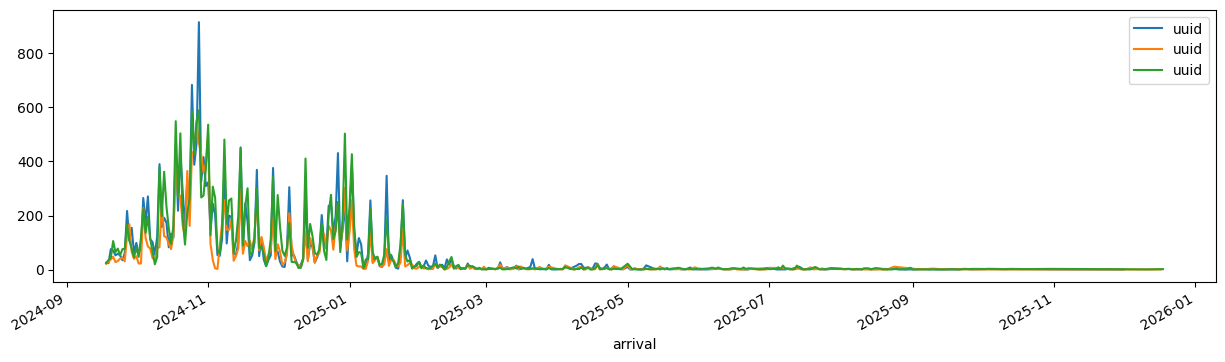

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(15,4))
hotel1[['arrival','uuid']].groupby(by='arrival').count().plot(ax=ax1)
hotel2[['arrival','uuid']].groupby(by='arrival').count().plot(ax=ax1)
hotel3[['arrival','uuid']].groupby(by='arrival').count().plot(ax=ax1)

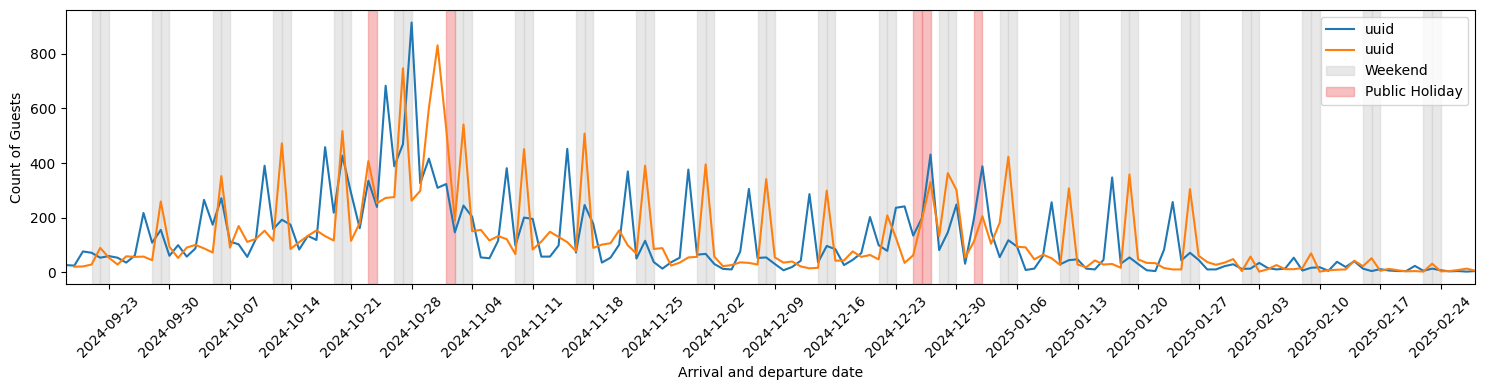

In [390]:
import matplotlib.dates as mdates
from datetime import timedelta

# List of Hungarian public holidays (2024-2025, adjust for your data range)
public_holidays = [
    "2024-10-23",  # Revolution Day
    "2024-11-01",  # All Saints' Day
    "2024-12-25",  # Christmas Day
    "2024-12-26",  # Second Day of Christmas
    "2025-01-01",  # New Year's Day
    "2025-03-15",  # Revolution Memorial Day
]

# Convert public holidays to datetime
public_holidays = pd.to_datetime(public_holidays)

# Create the figure and plot
fig, ax1 = plt.subplots(1, 1, figsize=(15, 4))

# Plot data for hotel1, hotel2, hotel3
hotel1[hotel1['arrival'] < '2025-03-01'][['arrival', 'uuid']].groupby(by='arrival').count().plot(ax=ax1, label='Hotel 1')
hotel1[hotel1['departure'] < '2025-03-01'][['departure', 'uuid']].groupby(by='departure').count().plot(ax=ax1, label='Hotel 1')

# Highlight weekends
start_date = pd.to_datetime('2024-09-01')  # Adjust based on your data range
end_date = pd.to_datetime('2025-03-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

# Format x-axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
plt.xticks(rotation=45)

ax1.set_xlabel('Arrival and departure date')
ax1.set_ylabel('Count of Guests')
plt.legend()
plt.tight_layout()
plt.show()


<Axes: xlabel='departure_day_of_week', ylabel='count'>

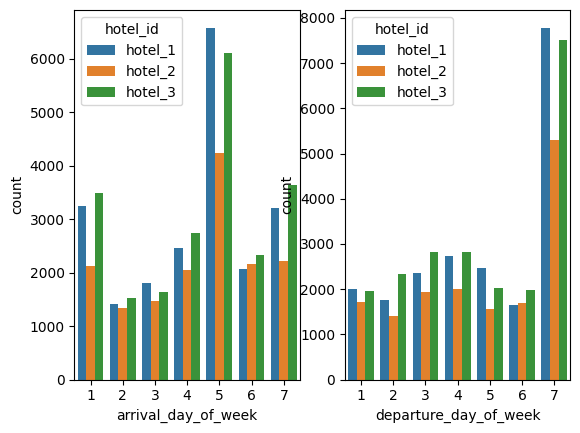

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
sns.countplot(ax=ax1, data=df, x='arrival_day_of_week', hue='hotel_id')
sns.countplot(ax=ax2, data=df, x='departure_day_of_week', hue='hotel_id')

<Axes: xlabel='arrival_day_of_week'>

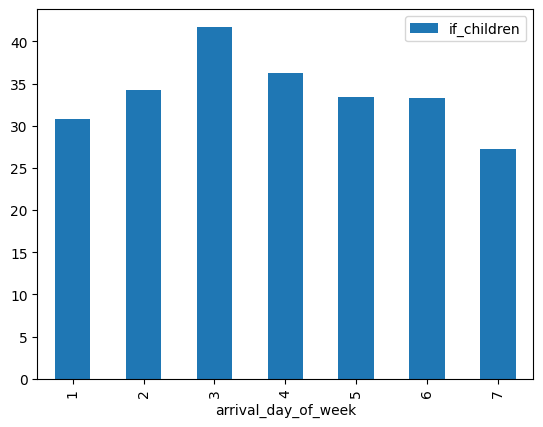

In [306]:
(df[['if_children','arrival_day_of_week']].groupby(by='arrival_day_of_week').mean()*100).plot(kind='bar')

<Axes: xlabel='departure_day_of_week'>

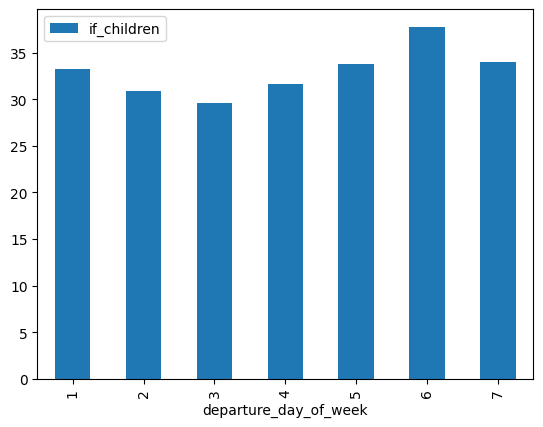

In [307]:
(df[['if_children','departure_day_of_week']].groupby(by='departure_day_of_week').mean()*100).plot(kind='bar')

<Axes: xlabel='day_of_week', ylabel='count'>

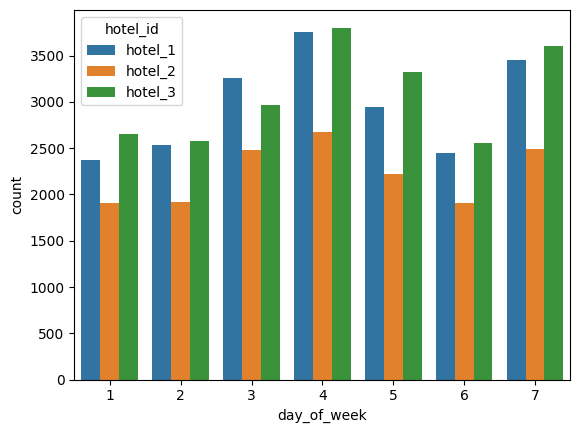

In [ ]:
# on which day the guests search for hotel rooms?
sns.countplot(data=df, x='day_of_week', hue='hotel_id')

<Axes: xlabel='time_of_day', ylabel='count'>

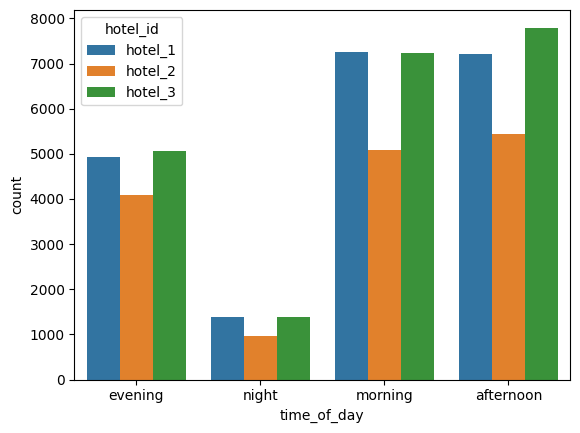

In [256]:
# on which time of the day the guests search for hotel rooms?

sns.countplot(data=df, x='time_of_day', hue='hotel_id')

<Axes: xlabel='currency', ylabel='lead_time'>

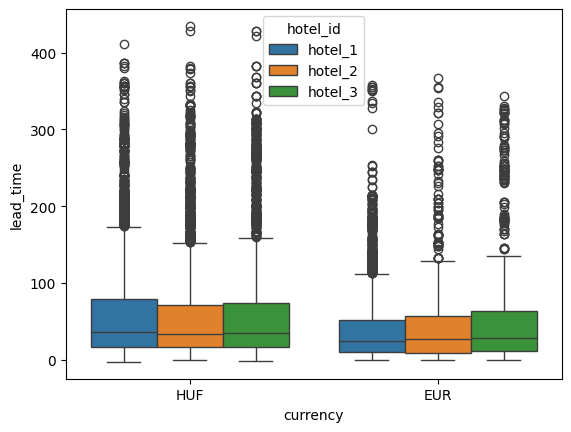

In [236]:
sns.boxplot(data=df[['currency','hotel_id', 'lead_time']], x='currency', y='lead_time', hue='hotel_id')

In [ ]:
# define the specific order for 'lead_time_category'
order = ['last_minute', 'short_term', 'medium_term', 'long_term']
df['lead_time_category'] = pd.Categorical(df['lead_time_category'], categories=order, ordered=True)

df[['nights', 'if_children', 'children_age_mean', 'conversion', 'picked_price_p_night','hotel_id','lead_time_category']].groupby(by=['hotel_id', 'lead_time_category'], sort=True).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

<Axes: xlabel='stay_includes_weekend', ylabel='count'>

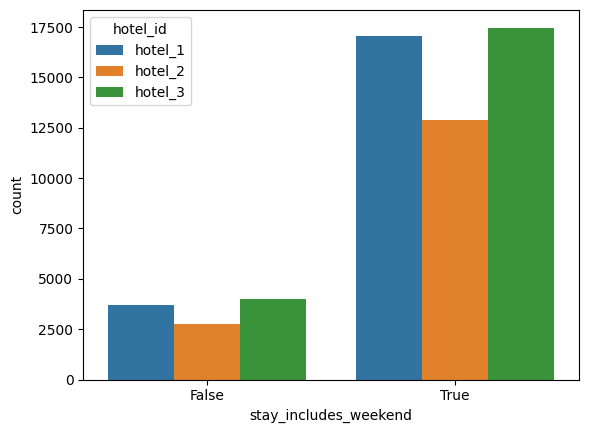

In [261]:
sns.countplot(data=df, x='stay_includes_weekend', hue='hotel_id')

<Axes: xlabel='days_of_week_in_stay'>

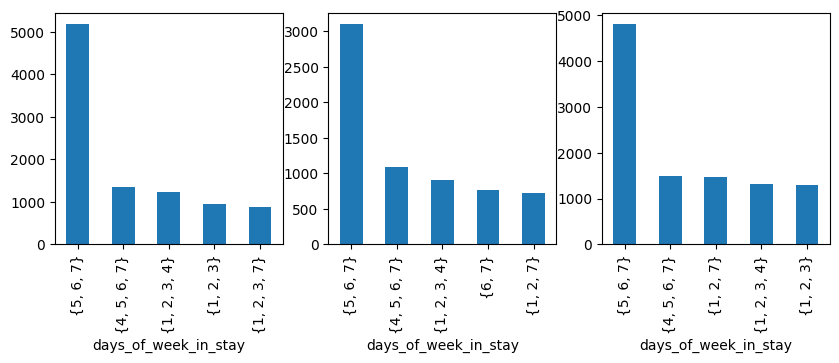

In [288]:
# most common weekday combinations
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))
hotel1['days_of_week_in_stay'].value_counts()[:5].plot(kind='bar', ax=ax1)
hotel2['days_of_week_in_stay'].value_counts()[:5].plot(kind='bar', ax=ax2)
hotel3['days_of_week_in_stay'].value_counts()[:5].plot(kind='bar', ax=ax3)

<Axes: xlabel='days_of_week_in_stay'>

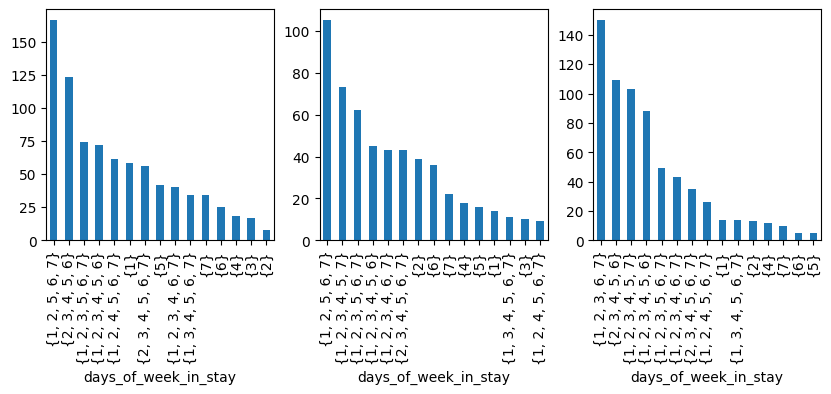

In [290]:
# most uncommon weekday combinations
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,3))
hotel1['days_of_week_in_stay'].value_counts()[-15:].plot(kind='bar', ax=ax1)
hotel2['days_of_week_in_stay'].value_counts()[-15:].plot(kind='bar', ax=ax2)
hotel3['days_of_week_in_stay'].value_counts()[-15:].plot(kind='bar', ax=ax3)

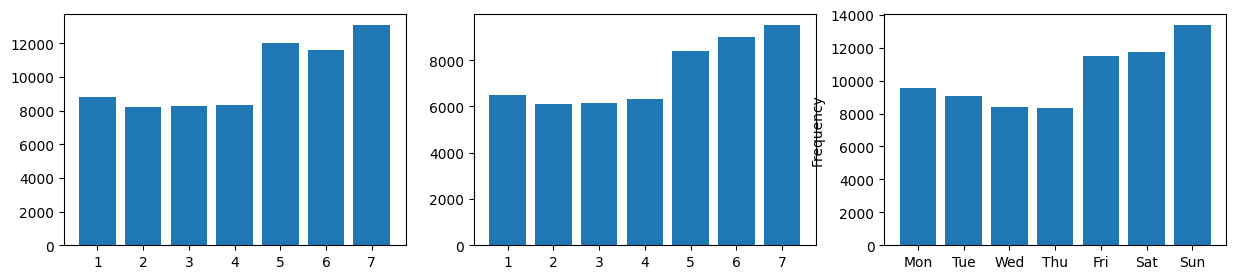

In [340]:
# which days are less popular?
from collections import Counter
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
day_counts_h1 = Counter(day for days in hotel1[hotel1['conversion']==0]['days_of_week_in_stay'] for day in days)
day_counts_h2 = Counter(day for days in hotel2[hotel2['conversion']==0]['days_of_week_in_stay'] for day in days)
day_counts_h3 = Counter(day for days in hotel3[hotel3['conversion']==0]['days_of_week_in_stay'] for day in days)
ax1.bar(day_counts_h1.keys(), day_counts_h1.values())
ax2.bar(day_counts_h2.keys(), day_counts_h2.values())
ax3.bar(day_counts_h3.keys(), day_counts_h3.values())
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel("Frequency")
plt.show()

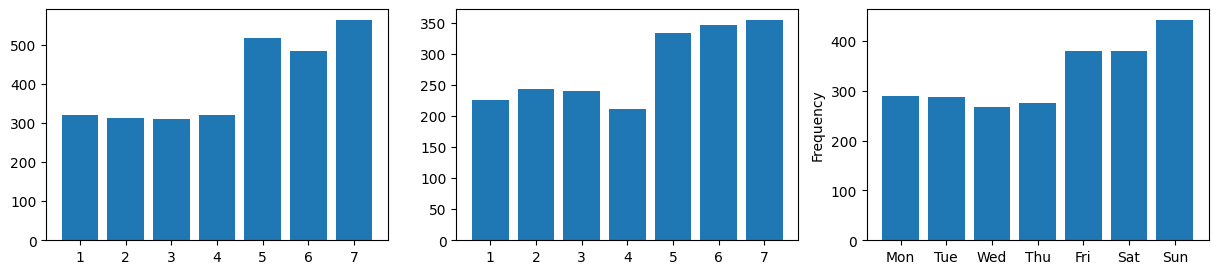

In [ ]:
# which days are less popular?
from collections import Counter
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,3))
day_counts_h1 = Counter(day for days in hotel1[hotel1['conversion']==1]['days_of_week_in_stay'] for day in days)
day_counts_h2 = Counter(day for days in hotel2[hotel2['conversion']==1]['days_of_week_in_stay'] for day in days)
day_counts_h3 = Counter(day for days in hotel3[hotel3['conversion']==1]['days_of_week_in_stay'] for day in days)
ax1.bar(day_counts_h1.keys(), day_counts_h1.values())
ax2.bar(day_counts_h2.keys(), day_counts_h2.values())
ax3.bar(day_counts_h3.keys(), day_counts_h3.values())
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel("Frequency")
plt.show()

In [346]:
df[['arrival_is_holiday', 'hotel_id','uuid']].groupby(by=['hotel_id','arrival_is_holiday']).count().style.format('{0:,.2f}').bar(color='#d65f5f')

In [347]:
df[['departure_is_holiday', 'hotel_id','uuid']].groupby(by=['hotel_id','departure_is_holiday']).count().style.format('{0:,.2f}').bar(color='#d65f5f')

In [348]:
df[['stay_includes_weekend', 'hotel_id','uuid']].groupby(by=['hotel_id','stay_includes_weekend']).count().style.format('{0:,.2f}').bar(color='#d65f5f')

In [349]:
df[['num_saturdays', 'hotel_id','num_sundays']].groupby(by=['hotel_id']).mean().style.format('{0:,.2f}').bar(color='#d65f5f')

,num_saturdays,num_sundays
hotel_id,,
hotel_1,0.59,0.66
hotel_2,0.60,0.63
hotel_3,0.57,0.65


In [414]:
search_and_conversion1 = hotel1[['arrival','uuid','conversion']].groupby(by='arrival').agg({'uuid':'count', 'conversion':'mean'}).reset_index()
search_and_conversion2 = hotel2[['arrival','uuid','conversion']].groupby(by='arrival').agg({'uuid':'count', 'conversion':'mean'}).reset_index()
search_and_conversion3 = hotel3[['arrival','uuid','conversion']].groupby(by='arrival').agg({'uuid':'count', 'conversion':'mean'}).reset_index()

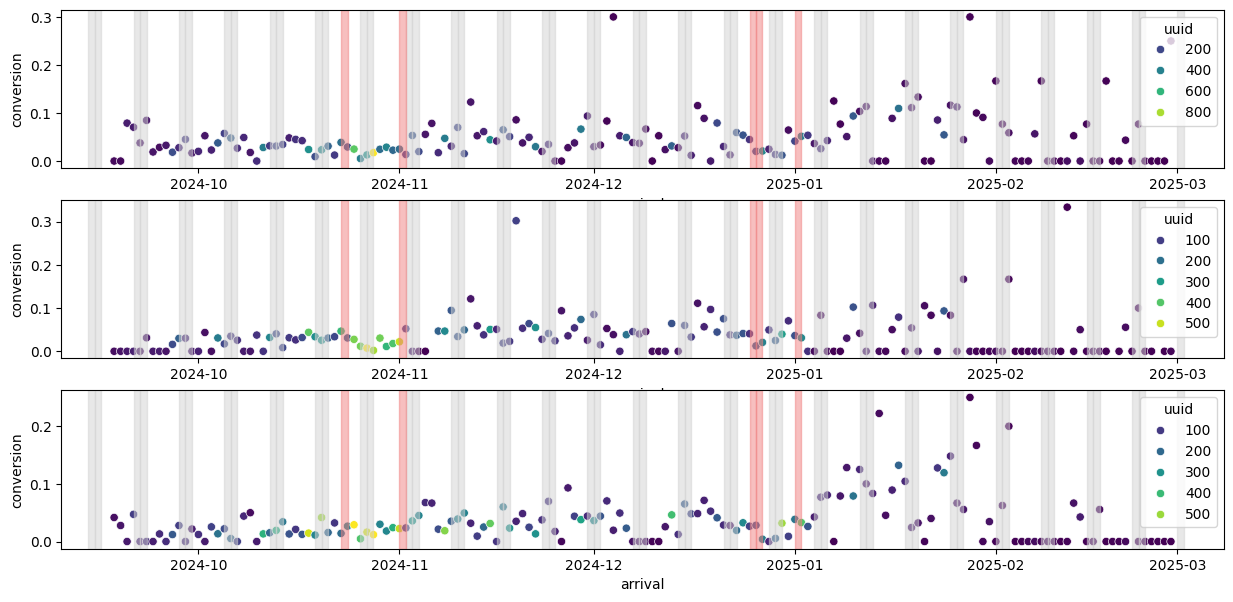

In [421]:
# what factors influences the conversion rate?

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(15,7))

sns.scatterplot(ax=ax1,
    data=search_and_conversion1[search_and_conversion1['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='uuid' ,palette='viridis')

sns.scatterplot(ax=ax2,
    data=search_and_conversion2[search_and_conversion2['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='uuid' ,palette='viridis')

sns.scatterplot(ax=ax3,
    data=search_and_conversion3[search_and_conversion3['arrival']<'2025-03-01'], 
    x='arrival',
    y='conversion', hue='uuid' ,palette='viridis')

# Highlight weekends
start_date = pd.to_datetime('2024-09-01')  # Adjust based on your data range
end_date = pd.to_datetime('2025-03-01')
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday (5) and Sunday (6)
        ax1.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax2.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
        ax3.axvspan(current_date, current_date + timedelta(days=1), color='lightgrey', alpha=0.5, label='Weekend' if current_date == start_date else None)
    current_date += timedelta(days=1)

# Highlight public holidays
for holiday in public_holidays:
    if start_date <= holiday <= end_date:
        ax1.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax2.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)
        ax3.axvspan(holiday, holiday + timedelta(days=1), color='lightcoral', alpha=0.5, label='Public Holiday' if holiday == public_holidays[0] else None)

<Axes: ylabel='Frequency'>

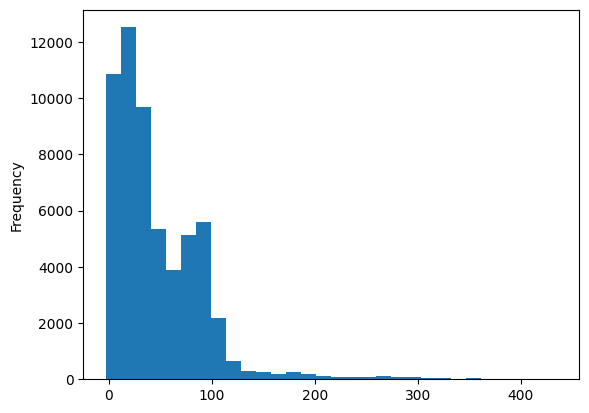

In [411]:
df['lead_time'].plot(kind='hist', bins=30)

<Axes: xlabel='lead_time'>

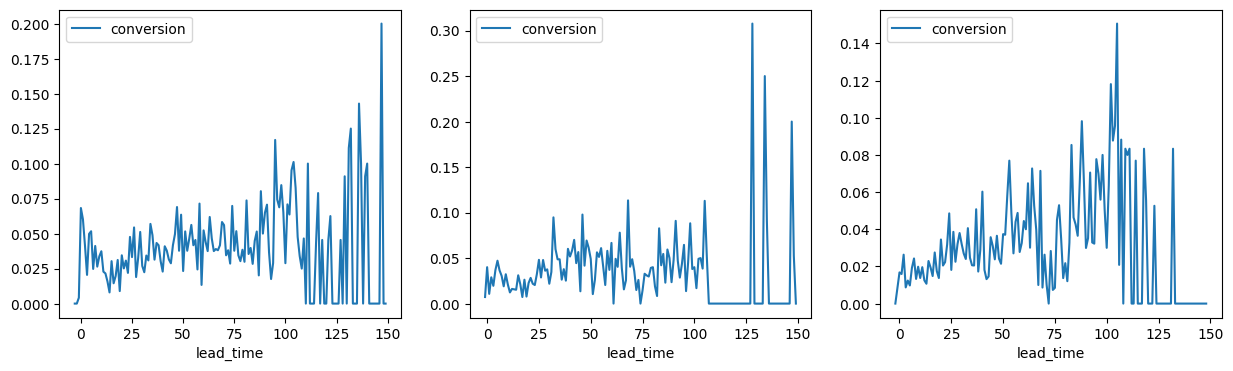

In [417]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
hotel1[hotel1['lead_time']<150][['lead_time','conversion']].groupby(by='lead_time').mean().plot(ax=ax1)
hotel2[hotel2['lead_time']<150][['lead_time','conversion']].groupby(by='lead_time').mean().plot(ax=ax2)
hotel3[hotel3['lead_time']<150][['lead_time','conversion']].groupby(by='lead_time').mean().plot(ax=ax3)

In [387]:
df[['hotel_id','conversion','rfm_duration_score']].groupby(by=['hotel_id','rfm_duration_score']).mean()

conversion
hotel_id rfm_duration_score            
hotel_1  1                     0.039979
         2-3                   0.035649
         4-9                   0.048000
hotel_2  1                     0.038440
         2-3                   0.034095
         4-9                   0.034623
hotel_3  1                     0.031059
         2-3                   0.030881
         4-9                   0.029630

In [434]:
# read occupancy data
occupancy = pd.read_csv('./../data-workfile/daily_occupancy.csv', index_col='Unnamed: 0')

In [440]:
occupancy[occupancy['hotel_id']=='hotel_1']

,recording_date,subject_date,fill_rate,hotel_id,days_until_stay,stay_day_of_week,subject_day_of_week,subject_is_weekend
0,2024-09-18,2024-09-18,67.368,hotel_1,0,2,2,0
1,2024-09-18,2024-09-19,65.789,hotel_1,1,3,3,0
2,2024-09-18,2024-09-20,67.895,hotel_1,2,4,4,0
3,2024-09-18,2024-09-21,59.474,hotel_1,3,5,5,1
4,2024-09-18,2024-09-22,43.684,hotel_1,4,6,6,1
...,...,...,...,...,...,...,...,...
10783,2024-10-18,2025-08-27,0.526,hotel_1,313,2,2,0
10784,2024-10-18,2025-08-28,0.526,hotel_1,314,3,3,0
10785,2024-10-18,2025-08-29,0.526,hotel_1,315,4,4,0
10786,2024-10-18,2025-08-30,0.526,hotel_1,316,5,5,1


<Axes: >

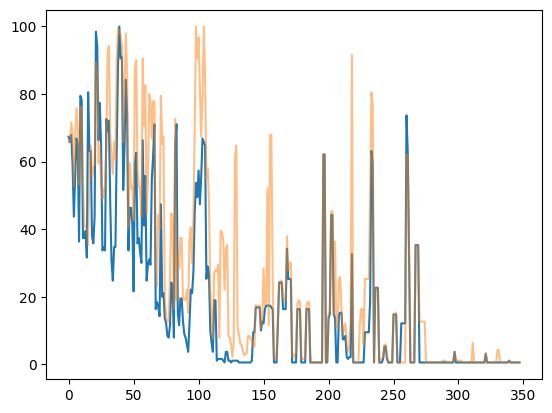

In [448]:
occupancy[(occupancy['hotel_id']=='hotel_1') & (occupancy['recording_date']=='2024-09-18')]['fill_rate'].plot()
occupancy[(occupancy['hotel_id']=='hotel_1') & (occupancy['recording_date']=='2024-10-18')]['fill_rate'].reset_index(drop=True).plot(alpha=0.5)

In [470]:
# mean occupancy for the subject date:

occupancy_hotel_1 = occupancy[occupancy['hotel_id']=='hotel_1'][['subject_date','fill_rate','days_until_stay']].groupby(by='subject_date').mean().reset_index().join(
    hotel1[['lead_time','conversion']].groupby(by='lead_time').mean(), on='days_until_stay', how='inner')
occupancy_hotel_2 = occupancy[occupancy['hotel_id']=='hotel_2'][['subject_date','fill_rate','days_until_stay']].groupby(by='subject_date').mean().reset_index().join(
    hotel2[['lead_time','conversion']].groupby(by='lead_time').mean(), on='days_until_stay', how='inner')
occupancy_hotel_3 = occupancy[occupancy['hotel_id']=='hotel_3'][['subject_date','fill_rate','days_until_stay']].groupby(by='subject_date').mean().reset_index().join(
    hotel3[['lead_time','conversion']].groupby(by='lead_time').mean(), on='days_until_stay', how='inner')

<Axes: xlabel='days_until_stay', ylabel='conversion'>

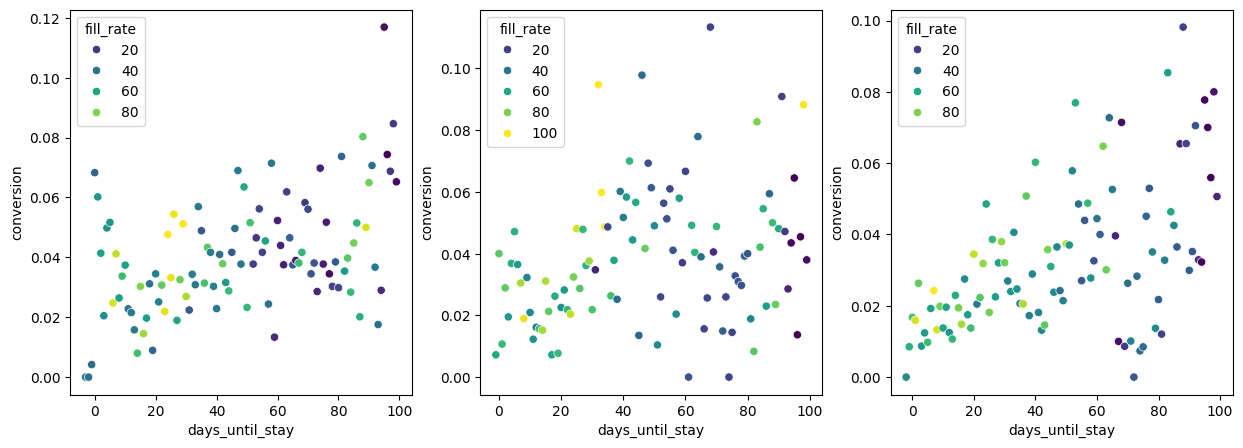

In [472]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(ax=ax1, data=occupancy_hotel_1[(occupancy_hotel_1['conversion']<0.2) & (occupancy_hotel_1['days_until_stay']<100)], x='days_until_stay', y='conversion', hue='fill_rate', palette='viridis')
sns.scatterplot(ax=ax2, data=occupancy_hotel_2[(occupancy_hotel_2['conversion']<0.2) & (occupancy_hotel_2['days_until_stay']<100)], x='days_until_stay', y='conversion', hue='fill_rate', palette='viridis')
sns.scatterplot(ax=ax3, data=occupancy_hotel_3[(occupancy_hotel_3['conversion']<0.2) & (occupancy_hotel_3['days_until_stay']<100)], x='days_until_stay', y='conversion', hue='fill_rate', palette='viridis')

In [ ]:
##### kovetkeztetes: lead time novekedesevel a konverzio es szabad helyek szama is novekszik, nem tudni ok-okozatot????

In [279]:
df.columns

Index(['search_log_session_id', 'search_log_id', 'session_id',
       'search_log_room_id', 'uuid', 'utc_datetime', 'utm_source',
       'utm_medium', 'utm_campaign', 'lang_code', 'currency', 'arrival',
       'departure', 'nights', 'adults', 'children', 'if_children',
       'children_age_mean', 'conversion', 'sel_num_of_rooms',
       'picked_price_median', 'picked_price_p_night', 'picked_room',
       'baby_bed', 'pieces', 'sum_price', 'total_price_final',
       'rooms_total_price', 'upsell_total_price', 'vouchers_total_price',
       'loyalty_discount_total', 'redeemed_loyalty_points_total', 'hotel_id',
       'rfm_monetary_score', 'rfm_duration_score', '0_age', '1_age', '2_age',
       '3_age', '4_age', 'ROOMAA_room_price_min', 'ROOMAA_room_price_max',
       'ROOMBB_room_price_min', 'ROOMBB_room_price_max',
       'ROOMCC_room_price_min', 'ROOMCC_room_price_max',
       'ROOMDD_room_price_min', 'ROOMDD_room_price_max',
       'ROOMEE_room_price_min', 'ROOMEE_room_price_max',
   

In [ ]:
# diagramra ratenni:
# - konverziós arányokat az adott dátumra (ezeket groupby alapjan összevonassal)
# + ezt összevetni a foglaltsági számokkal

In [ ]:
# offered room közül melyiket választják?
# mennyi az offered price range, és abból melyiket választották

# melyek a nem eredményes kampányok, és miért?
# akik keresnek, mit keresnek?
# milyen időszakokat keresnek?
# mi az oka, hogy egy időszakot nagyon keresnek, de aztán nem foglalnak?

# funnel for each segment


# - a felajánlott szobák közül melyiket választják
#    - ezt mi befolyásolja
#    - Melyik célcsoport melyik áru szobát választja?